In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection
from sklearn import preprocessing
from sklearn import decomposition
import scipy.stats as st
from scipy.stats import ks_2samp
import matplotlib.lines as mlines
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

In [2]:
data = pd.read_csv("data-projet7.csv")#example
print(data.shape)
data

(11599, 6)


,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297
...,...,...,...,...,...,...
11594,COD,2008,96,100,"810,6233","303,19305"
11595,COD,2008,97,100,"911,7834","303,19305"
11596,COD,2008,98,100,"1057,8074","303,19305"
11597,COD,2008,99,100,"1286,6029","303,19305"


In [3]:
data.describe(include = 'all')

,country,year_survey,quantile,nb_quantiles,income,gdpppp
count,11599,11599.000000,11599.000000,11599.0,11599,11399
unique,116,NaN,NaN,NaN,11598,114
top,TWN,NaN,NaN,NaN,"2952,6",6721
freq,100,NaN,NaN,NaN,2,100
mean,NaN,2007.982757,50.500819,100.0,NaN,NaN
std,NaN,0.909633,28.868424,0.0,NaN,NaN
min,NaN,2004.000000,1.000000,100.0,NaN,NaN
25%,NaN,2008.000000,25.500000,100.0,NaN,NaN
50%,NaN,2008.000000,51.000000,100.0,NaN,NaN
75%,NaN,2008.000000,75.500000,100.0,NaN,NaN


In [4]:
print("nombre de NaN :")
print(data.isna().sum())

nombre de NaN :
country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64


In [5]:
data[data.gdpppp.isna()]['country'].value_counts()

PSE    100
XKX    100
Name: country, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       11599 non-null  object
 1   year_survey   11599 non-null  int64 
 2   quantile      11599 non-null  int64 
 3   nb_quantiles  11599 non-null  int64 
 4   income        11599 non-null  object
 5   gdpppp        11399 non-null  object
dtypes: int64(3), object(3)
memory usage: 543.8+ KB


In [7]:
data.income=data.income.str.replace(',', '.').astype(float)

In [8]:
data.gdpppp=data.gdpppp.str.replace(',', '.').astype(float)

In [9]:
data.describe(include = 'all')

,country,year_survey,quantile,nb_quantiles,income,gdpppp
count,11599,11599.000000,11599.000000,11599.0,11599.000000,1.139900e+04
unique,116,NaN,NaN,NaN,NaN,NaN
top,TWN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.982757,50.500819,100.0,6069.224260,5.022128e+04
std,NaN,0.909633,28.868424,0.0,9414.185972,4.000688e+05
min,NaN,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,NaN,2008.000000,25.500000,100.0,900.685515,2.576000e+03
50%,NaN,2008.000000,51.000000,100.0,2403.244900,7.560000e+03
75%,NaN,2008.000000,75.500000,100.0,7515.420900,1.877300e+04


In [10]:
data[data['quantile'] == 1].pivot(columns='year_survey', index='country',values='income').head(59)

year_survey,2004,2006,2007,2008,2009,2010,2011
country,,,,,,,
ALB,NaN,NaN,NaN,728.897950,NaN,NaN,NaN
ARG,NaN,NaN,NaN,254.089420,NaN,NaN,NaN
ARM,NaN,NaN,NaN,366.617800,NaN,NaN,NaN
AUT,NaN,NaN,NaN,2958.076400,NaN,NaN,NaN
AZE,NaN,NaN,NaN,397.539830,NaN,NaN,NaN
BEL,NaN,NaN,NaN,2421.941700,NaN,NaN,NaN
BFA,NaN,NaN,NaN,NaN,138.40517,NaN,NaN
BGD,NaN,NaN,NaN,NaN,NaN,276.93503,NaN
BGR,NaN,NaN,NaN,271.093100,NaN,NaN,NaN


In [11]:
data[data['quantile'] == 1].pivot(columns='year_survey', index='country',values='income').tail(59)

year_survey,2004,2006,2007,2008,2009,2010,2011
country,,,,,,,
KHM,NaN,NaN,NaN,345.874970,NaN,NaN,NaN
KOR,NaN,NaN,NaN,17.317732,NaN,NaN,NaN
LAO,NaN,NaN,190.141400,NaN,NaN,NaN,NaN
LBR,NaN,NaN,37.782673,NaN,NaN,NaN,NaN
LKA,NaN,NaN,363.082950,NaN,NaN,NaN,NaN
LTU,NaN,NaN,NaN,566.345300,NaN,NaN,NaN
LUX,NaN,NaN,NaN,5780.837400,NaN,NaN,NaN
LVA,NaN,NaN,NaN,609.161250,NaN,NaN,NaN
MAR,NaN,NaN,353.848900,NaN,NaN,NaN,NaN


#on remarque que chaque pays n a qu une année referencée

In [12]:
data.groupby(['year_survey']).count().sort_values(by='year_survey', ascending=True).tail(50)
#nb annees + nb pays /annee 76 pays sur 116 sont referencés en 2008

,country,quantile,nb_quantiles,income,gdpppp
year_survey,,,,,
2004,100,100,100,100,100
2006,500,500,500,500,500
2007,1500,1500,1500,1500,1500
2008,7599,7599,7599,7599,7499
2009,1200,1200,1200,1200,1100
2010,600,600,600,600,600
2011,100,100,100,100,100


In [13]:
data.groupby(['country', 'year_survey']).count().sort_values(by='gdpppp', ascending=True)
## pour XKX et PSE il manque 'gdpppp' ,  à LTU il manque 1 ligne

,,quantile,nb_quantiles,income,gdpppp
country,year_survey,,,,
XKX,2008,100,100,100,0
PSE,2009,100,100,100,0
LTU,2008,99,99,99,99
ALB,2008,100,100,100,100
PAK,2008,100,100,100,100
...,...,...,...,...,...
FIN,2008,100,100,100,100
EST,2008,100,100,100,100
ESP,2008,100,100,100,100


#data=data[data["country"]!="XKX"]#GDPPPP 2008 ...7250

#data=data[data["country"]!="PSE"]#GDPPPP 2009 ...3155

https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita

https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?locations=LT&name_desc=false(lithuanie pour tester)

https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?locations=PS&name_desc=false ...source valeur 'gdpppp' palestine 2009

https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?locations=XK&name_desc=false  ...source valeur 'gdpppp' kossovo 2008

 gross domestic product based on purchasing power parity, abbreviated GDP (PPP).[2] Countries are sorted by GDP (PPP) forecast estimates from financial and statistical institutions that calculate using market or government official exchange rates. The data given on this page are based on the international dollar, a standardized unit used by economists. Certain regions that are not widely considered countries such as the European Union and Hong Kong also show up in the list if they are distinct jurisdiction areas or economic entities.
GDP comparisons using PPP are arguably more useful than those using nominal GDP when assessing a nation's domestic market because
PPP takes into account the relative cost of local goods, services and inflation rates of the country, rather than using international market exchange rates

In [14]:
data.loc[data['country'] == 'XKX', 'gdpppp'] = 7250 #kossovo 2008 affectation de la valeur

In [15]:
data.loc[data['country'] == 'PSE', 'gdpppp'] = 3155 #palestine 2009 affectation de la valeur

In [16]:
data[data['country'] == 'LTU'].head(50) # il manque le quantile 41

,country,year_survey,quantile,nb_quantiles,income,gdpppp
6200,LTU,2008,1,100,566.3453,17571.0
6201,LTU,2008,2,100,1147.0587,17571.0
6202,LTU,2008,3,100,1490.8408,17571.0
6203,LTU,2008,4,100,1746.5715,17571.0
6204,LTU,2008,5,100,1842.9542,17571.0
6205,LTU,2008,6,100,1925.8641,17571.0
6206,LTU,2008,7,100,2048.3857,17571.0
6207,LTU,2008,8,100,2173.7112,17571.0
6208,LTU,2008,9,100,2302.0857,17571.0
6209,LTU,2008,10,100,2361.6480,17571.0


#on rajoute le quantile 41 manquant :

In [17]:
temp1 = ((data.loc[(data['country']=='LTU') & (data['quantile']==40)]['income'].values + data.loc[(data['country']=='LTU') & (data['quantile']==42)]['income'].values)/2).copy()
temp = data.loc[(data['country']=='LTU') & (data['quantile']==40)].copy()
temp['quantile'] = 41
temp['income'] = temp1
datatemp = data.copy()
datatemp = datatemp.append(temp, ignore_index=True, sort=False)
data = datatemp.copy()
del datatemp
del temp
del temp1
data

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.00000
1,ALB,2008,2,100,916.66235,7297.00000
2,ALB,2008,3,100,1010.91600,7297.00000
3,ALB,2008,4,100,1086.90780,7297.00000
4,ALB,2008,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305
11596,COD,2008,98,100,1057.80740,303.19305
11597,COD,2008,99,100,1286.60290,303.19305
11598,COD,2008,100,100,2243.12260,303.19305


In [18]:
data.shape[0]#verification multiple de 100 et nombre de pays

11600

In [19]:
data.country.unique().shape

(116,)

In [20]:
data.country.unique()#choisir entre le chine et taiwan????

array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO',
       'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KOR', 'XKX', 'LAO', 'LBR', 'LKA', 'LTU',
       'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE',
       'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD',
       'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'ROU', 'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ',
       'SYR', 'THA', 'TJK', 'TLS', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR',
       'URY', 'USA', 'VEN', 'VNM', 'PSE', 'YEM', 'ZAF', 'COD'],
      dtype=object)

#Apres avoir récupéré sur internet une liste de dictionnaires afin d’avoir la correspondance  des noms complets avec 
leurs codes standardisés au format iso, nous y ajoutons le code région qui nous servira a y intégrer 
le coefficient d’élasticité pj fourni par le fichier elasticity.txt .


Constantly updated lists of world countries, territories and areas of geographical interest, with associated alpha-2, alpha-3 and numeric codes as defined by the ISO 3166-1 standard, published and maintained by the International Organization for Standardization, available in SQL, CSV, JSON and PHP formats, in multiple languages and with national flags included.
https://github.com/stefangabos/world_countries/blob/7d19c162fc6df8773e5660c5dabe1b6e9cdf9c8a/data/sk/countries.json

In [21]:
#"region":1 = Nordic European countries and Canada |    0.2 
#"region":2 = Europe (except nordic countries)    |    0.4
#"region":3 = Australia/New Zealand/USA |    0.4   
#"region":4 = Asia                      |    0.5  
#"region":5 = Latin America/Africa      |    0.66  

ccode=[{"id":4,"name":"Afghanistan","alpha2":"af","alpha3":"afg","region":4},
{"id":8,"name":"Albania","alpha2":"al","alpha3":"alb","region":2},
{"id":12,"name":"Algeria","alpha2":"dz","alpha3":"dza","region":5},
{"id":20,"name":"Andorra","alpha2":"ad","alpha3":"and","region":2},
{"id":24,"name":"Angola","alpha2":"ao","alpha3":"ago","region":5},
{"id":28,"name":"Antigua and Barbuda","alpha2":"ag","alpha3":"atg","region":3},
{"id":32,"name":"Argentina","alpha2":"ar","alpha3":"arg","region":5},
{"id":51,"name":"Armenia","alpha2":"am","alpha3":"arm","region":2},
{"id":36,"name":"Australia","alpha2":"au","alpha3":"aus","region":3},
{"id":40,"name":"Austria","alpha2":"at","alpha3":"aut","region":2},
{"id":31,"name":"Azerbaijan","alpha2":"az","alpha3":"aze","region":4},
{"id":44,"name":"Bahamas","alpha2":"bs","alpha3":"bhs","region":3},
{"id":48,"name":"Bahrain","alpha2":"bh","alpha3":"bhr","region":4},
{"id":50,"name":"Bangladesh","alpha2":"bd","alpha3":"bgd","region":4},
{"id":52,"name":"Barbados","alpha2":"bb","alpha3":"brb","region":5},
{"id":112,"name":"Belarus","alpha2":"by","alpha3":"blr","region":2},
{"id":56,"name":"Belgium","alpha2":"be","alpha3":"bel","region":2},
{"id":84,"name":"Belize","alpha2":"bz","alpha3":"blz","region":5},
{"id":204,"name":"Benin","alpha2":"bj","alpha3":"ben","region":5},
{"id":64,"name":"Bhutan","alpha2":"bt","alpha3":"btn","region":4},
{"id":68,"name":"Bolivia (Plurinational State of)","alpha2":"bo","alpha3":"bol","region":5},
{"id":70,"name":"Bosnia and Herzegovina","alpha2":"ba","alpha3":"bih","region":2},
{"id":72,"name":"Botswana","alpha2":"bw","alpha3":"bwa","region":5},
{"id":76,"name":"Brazil","alpha2":"br","alpha3":"bra","region":5},
{"id":96,"name":"Brunei Darussalam","alpha2":"bn","alpha3":"brn","region":4},
{"id":100,"name":"Bulgaria","alpha2":"bg","alpha3":"bgr","region":2},
{"id":854,"name":"Burkina Faso","alpha2":"bf","alpha3":"bfa","region":5},
{"id":108,"name":"Burundi","alpha2":"bi","alpha3":"bdi","region":5},
{"id":132,"name":"Cabo Verde","alpha2":"cv","alpha3":"cpv","region":5},
{"id":116,"name":"Cambodia","alpha2":"kh","alpha3":"khm","region":4},
{"id":120,"name":"Cameroon","alpha2":"cm","alpha3":"cmr","region":5},
{"id":124,"name":"Canada","alpha2":"ca","alpha3":"can","region":1},
{"id":140,"name":"Central African Republic","alpha2":"cf","alpha3":"caf","region":5},
{"id":148,"name":"Chad","alpha2":"td","alpha3":"tcd","region":5},
{"id":152,"name":"Chile","alpha2":"cl","alpha3":"chl","region":5},
{"id":156,"name":"China","alpha2":"cn","alpha3":"chn","region":4},
{"id":170,"name":"Colombia","alpha2":"co","alpha3":"col","region":5},
{"id":174,"name":"Comoros","alpha2":"km","alpha3":"com","region":5},
{"id":178,"name":"Congo","alpha2":"cg","alpha3":"cog","region":5},
{"id":180,"name":"Congo","alpha2":"cd","alpha3":"cod","region":5},
{"id":188,"name":"Costa Rica","alpha2":"cr","alpha3":"cri","region":5},
{"id":384,"name":"Côte d'Ivoire","alpha2":"ci","alpha3":"civ","region":5},
{"id":191,"name":"Croatia","alpha2":"hr","alpha3":"hrv","region":2},
{"id":192,"name":"Cuba","alpha2":"cu","alpha3":"cub","region":5},
{"id":196,"name":"Cyprus","alpha2":"cy","alpha3":"cyp","region":2},
{"id":203,"name":"Czechia","alpha2":"cz","alpha3":"cze","region":2},
{"id":208,"name":"Denmark","alpha2":"dk","alpha3":"dnk","region":1},
{"id":262,"name":"Djibouti","alpha2":"dj","alpha3":"dji","region":5},
{"id":212,"name":"Dominica","alpha2":"dm","alpha3":"dma","region":5},
{"id":214,"name":"Dominican Republic","alpha2":"do","alpha3":"dom","region":5},
{"id":218,"name":"Ecuador","alpha2":"ec","alpha3":"ecu","region":5},
{"id":818,"name":"Egypt","alpha2":"eg","alpha3":"egy","region":5},
{"id":222,"name":"El Salvador","alpha2":"sv","alpha3":"slv","region":5},
{"id":226,"name":"Equatorial Guinea","alpha2":"gq","alpha3":"gnq","region":5},
{"id":232,"name":"Eritrea","alpha2":"er","alpha3":"eri","region":5},
{"id":233,"name":"Estonia","alpha2":"ee","alpha3":"est","region":2},
{"id":748,"name":"Eswatini","alpha2":"sz","alpha3":"swz","region":5},
{"id":231,"name":"Ethiopia","alpha2":"et","alpha3":"eth","region":5},
{"id":242,"name":"Fiji","alpha2":"fj","alpha3":"fji","region":4},
{"id":246,"name":"Finland","alpha2":"fi","alpha3":"fin","region":1},
{"id":250,"name":"France","alpha2":"fr","alpha3":"fra","region":2},
{"id":266,"name":"Gabon","alpha2":"ga","alpha3":"gab","region":5},
{"id":270,"name":"Gambia","alpha2":"gm","alpha3":"gmb","region":5},
{"id":268,"name":"Georgia","alpha2":"ge","alpha3":"geo","region":4},
{"id":276,"name":"Germany","alpha2":"de","alpha3":"deu","region":2},
{"id":288,"name":"Ghana","alpha2":"gh","alpha3":"gha","region":5},
{"id":300,"name":"Greece","alpha2":"gr","alpha3":"grc","region":2},
{"id":308,"name":"Grenada","alpha2":"gd","alpha3":"grd","region":5},
{"id":320,"name":"Guatemala","alpha2":"gt","alpha3":"gtm","region":5},
{"id":324,"name":"Guinea","alpha2":"gn","alpha3":"gin","region":5},
{"id":624,"name":"Guinea-Bissau","alpha2":"gw","alpha3":"gnb","region":5},
{"id":328,"name":"Guyana","alpha2":"gy","alpha3":"guy","region":5},
{"id":332,"name":"Haiti","alpha2":"ht","alpha3":"hti","region":5},
{"id":340,"name":"Honduras","alpha2":"hn","alpha3":"hnd","region":5},
{"id":348,"name":"Hungary","alpha2":"hu","alpha3":"hun","region":2},
{"id":352,"name":"Iceland","alpha2":"is","alpha3":"isl","region":1},
{"id":356,"name":"India","alpha2":"in","alpha3":"ind","region":4},
{"id":360,"name":"Indonesia","alpha2":"id","alpha3":"idn","region":4},
{"id":364,"name":"Iran (Islamic Republic of)","alpha2":"ir","alpha3":"irn","region":4},
{"id":368,"name":"Iraq","alpha2":"iq","alpha3":"irq","region":4},
{"id":372,"name":"Ireland","alpha2":"ie","alpha3":"irl","region":2},
{"id":376,"name":"Israel","alpha2":"il","alpha3":"isr","region":4},
{"id":380,"name":"Italy","alpha2":"it","alpha3":"ita","region":2},
{"id":388,"name":"Jamaica","alpha2":"jm","alpha3":"jam","region":5},
{"id":392,"name":"Japan","alpha2":"jp","alpha3":"jpn","region":4},
{"id":400,"name":"Jordan","alpha2":"jo","alpha3":"jor","region":4},
{"id":398,"name":"Kazakhstan","alpha2":"kz","alpha3":"kaz","region":4},
{"id":404,"name":"Kenya","alpha2":"ke","alpha3":"ken","region":5},
{"id":296,"name":"Kiribati","alpha2":"ki","alpha3":"kir","region":4},
{"id":408,"name":"Korea (Democratic People's Republic of)","alpha2":"kp","alpha3":"prk","region":4},
{"id":410,"name":"Republic of Korea","alpha2":"kr","alpha3":"kor","region":4},
{"id":414,"name":"Kuwait","alpha2":"kw","alpha3":"kwt","region":4},
{"id":417,"name":"Kyrgyzstan","alpha2":"kg","alpha3":"kgz","region":4},
{"id":418,"name":"Lao People's Democratic Republic","alpha2":"la","alpha3":"lao","region":4},
{"id":428,"name":"Latvia","alpha2":"lv","alpha3":"lva","region":4},
{"id":422,"name":"Lebanon","alpha2":"lb","alpha3":"lbn","region":4},
{"id":426,"name":"Lesotho","alpha2":"ls","alpha3":"lso","region":5},
{"id":430,"name":"Liberia","alpha2":"lr","alpha3":"lbr","region":5},
{"id":434,"name":"Libya","alpha2":"ly","alpha3":"lby","region":5},
{"id":438,"name":"Liechtenstein","alpha2":"li","alpha3":"lie","region":2},
{"id":440,"name":"Lithuania","alpha2":"lt","alpha3":"ltu","region":2},
{"id":442,"name":"Luxembourg","alpha2":"lu","alpha3":"lux","region":2},
{"id":450,"name":"Madagascar","alpha2":"mg","alpha3":"mdg","region":5},
{"id":454,"name":"Malawi","alpha2":"mw","alpha3":"mwi","region":5},
{"id":458,"name":"Malaysia","alpha2":"my","alpha3":"mys","region":4},
{"id":462,"name":"Maldives","alpha2":"mv","alpha3":"mdv","region":4},
{"id":466,"name":"Mali","alpha2":"ml","alpha3":"mli","region":5},
{"id":470,"name":"Malta","alpha2":"mt","alpha3":"mlt","region":2},
{"id":584,"name":"Marshall Islands","alpha2":"mh","alpha3":"mhl","region":4},
{"id":478,"name":"Mauritania","alpha2":"mr","alpha3":"mrt","region":5},
{"id":480,"name":"Mauritius","alpha2":"mu","alpha3":"mus","region":5},
{"id":484,"name":"Mexico","alpha2":"mx","alpha3":"mex","region":5},
{"id":583,"name":"Micronesia (Federated States of)","alpha2":"fm","alpha3":"fsm","region":4},
{"id":498,"name":"Republic of Moldova","alpha2":"md","alpha3":"mda","region":2},
{"id":492,"name":"Monaco","alpha2":"mc","alpha3":"mco","region":2},
{"id":496,"name":"Mongolia","alpha2":"mn","alpha3":"mng","region":4},
{"id":499,"name":"Montenegro","alpha2":"me","alpha3":"mne","region":2},
{"id":504,"name":"Morocco","alpha2":"ma","alpha3":"mar","region":5},
{"id":508,"name":"Mozambique","alpha2":"mz","alpha3":"moz","region":5},
{"id":104,"name":"Myanmar","alpha2":"mm","alpha3":"mmr","region":4},
{"id":516,"name":"Namibia","alpha2":"na","alpha3":"nam","region":5},
{"id":520,"name":"Nauru","alpha2":"nr","alpha3":"nru","region":4},
{"id":524,"name":"Nepal","alpha2":"np","alpha3":"npl","region":4},
{"id":528,"name":"Netherlands","alpha2":"nl","alpha3":"nld","region":2},
{"id":554,"name":"New Zealand","alpha2":"nz","alpha3":"nzl","region":3},
{"id":558,"name":"Nicaragua","alpha2":"ni","alpha3":"nic","region":5},
{"id":562,"name":"Niger","alpha2":"ne","alpha3":"ner","region":5},
{"id":566,"name":"Nigeria","alpha2":"ng","alpha3":"nga","region":5},
{"id":807,"name":"North Macedonia","alpha2":"mk","alpha3":"mkd","region":2},
{"id":578,"name":"Norway","alpha2":"no","alpha3":"nor","region":1},
{"id":512,"name":"Oman","alpha2":"om","alpha3":"omn","region":4},
{"id":586,"name":"Pakistan","alpha2":"pk","alpha3":"pak","region":4},
{"id":585,"name":"Palau","alpha2":"pw","alpha3":"plw","region":4},
{"id":591,"name":"Panama","alpha2":"pa","alpha3":"pan","region":5},
{"id":598,"name":"Papua New Guinea","alpha2":"pg","alpha3":"png","region":5},
{"id":600,"name":"Paraguay","alpha2":"py","alpha3":"pry","region":5},
{"id":604,"name":"Peru","alpha2":"pe","alpha3":"per","region":5},
{"id":608,"name":"Philippines","alpha2":"ph","alpha3":"phl","region":4},
{"id":616,"name":"Poland","alpha2":"pl","alpha3":"pol","region":2},
{"id":620,"name":"Portugal","alpha2":"pt","alpha3":"prt","region":2},
{"id":634,"name":"Qatar","alpha2":"qa","alpha3":"qat","region":4},
{"id":642,"name":"Romania","alpha2":"ro","alpha3":"rou","region":2},
{"id":643,"name":"Russian Federation","alpha2":"ru","alpha3":"rus","region":4},
{"id":646,"name":"Rwanda","alpha2":"rw","alpha3":"rwa","region":5},
{"id":659,"name":"Saint Kitts and Nevis","alpha2":"kn","alpha3":"kna","region":5},
{"id":662,"name":"Saint Lucia","alpha2":"lc","alpha3":"lca","region":5},
{"id":670,"name":"Saint Vincent and the Grenadines","alpha2":"vc","alpha3":"vct","region":5},
{"id":882,"name":"Samoa","alpha2":"ws","alpha3":"wsm","region":4},
{"id":674,"name":"San Marino","alpha2":"sm","alpha3":"smr","region":2},
{"id":678,"name":"Sao Tome and Principe","alpha2":"st","alpha3":"stp","region":5},
{"id":682,"name":"Saudi Arabia","alpha2":"sa","alpha3":"sau","region":4},
{"id":686,"name":"Senegal","alpha2":"sn","alpha3":"sen","region":5},
{"id":688,"name":"Serbia","alpha2":"rs","alpha3":"srb","region":2},
{"id":690,"name":"Seychelles","alpha2":"sc","alpha3":"syc","region":5},
{"id":694,"name":"Sierra Leone","alpha2":"sl","alpha3":"sle","region":5},
{"id":702,"name":"Singapore","alpha2":"sg","alpha3":"sgp","region":4},
{"id":703,"name":"Slovakia","alpha2":"sk","alpha3":"svk","region":2},
{"id":705,"name":"Slovenia","alpha2":"si","alpha3":"svn","region":2},
{"id":90,"name":"Solomon Islands","alpha2":"sb","alpha3":"slb","region":4},
{"id":706,"name":"Somalia","alpha2":"so","alpha3":"som","region":5},
{"id":710,"name":"South Africa","alpha2":"za","alpha3":"zaf","region":5},
{"id":728,"name":"South Sudan","alpha2":"ss","alpha3":"ssd","region":5},
{"id":724,"name":"Spain","alpha2":"es","alpha3":"esp","region":2},
{"id":144,"name":"Sri Lanka","alpha2":"lk","alpha3":"lka","region":4},
#{"id":729,"name":"Sudan","alpha2":"sd","alpha3":"sdn","region":5},
{"id":729,"name":"Sudan (former)","alpha2":"sd","alpha3":"sdn","region":5},
{"id":740,"name":"Suriname","alpha2":"sr","alpha3":"sur","region":5},
{"id":752,"name":"Sweden","alpha2":"se","alpha3":"swe","region":1},
{"id":756,"name":"Switzerland","alpha2":"ch","alpha3":"che","region":2},
{"id":760,"name":"Syrian Arab Republic","alpha2":"sy","alpha3":"syr","region":4},
{"id":762,"name":"Tajikistan","alpha2":"tj","alpha3":"tjk","region":4},
#{"id":834,"name":"Tanzania, United Republic of","alpha2":"tz","alpha3":"tza","region":5},
{"id":834,"name":"United Republic of Tanzania","alpha2":"tz","alpha3":"tza","region":5},
{"id":764,"name":"Thailand","alpha2":"th","alpha3":"tha","region":4},
{"id":626,"name":"Timor-Leste","alpha2":"tl","alpha3":"tls","region":4},
{"id":768,"name":"Togo","alpha2":"tg","alpha3":"tgo","region":5},
{"id":776,"name":"Tonga","alpha2":"to","alpha3":"ton","region":4},
{"id":780,"name":"Trinidad and Tobago","alpha2":"tt","alpha3":"tto","region":5},
{"id":788,"name":"Tunisia","alpha2":"tn","alpha3":"tun","region":5},
{"id":792,"name":"Turkey","alpha2":"tr","alpha3":"tur","region":4},
{"id":795,"name":"Turkmenistan","alpha2":"tm","alpha3":"tkm","region":4},
{"id":798,"name":"Tuvalu","alpha2":"tv","alpha3":"tuv","region":4},
{"id":800,"name":"Uganda","alpha2":"ug","alpha3":"uga","region":5},
{"id":804,"name":"Ukraine","alpha2":"ua","alpha3":"ukr","region":2},
{"id":784,"name":"United Arab Emirates","alpha2":"ae","alpha3":"are","region":4},
{"id":826,"name":"United Kingdom of Great Britain and Northern Ireland","alpha2":"gb","alpha3":"gbr","region":4},
{"id":840,"name":"United States of America","alpha2":"us","alpha3":"usa","region":3},
{"id":858,"name":"Uruguay","alpha2":"uy","alpha3":"ury","region":5},
{"id":860,"name":"Uzbekistan","alpha2":"uz","alpha3":"uzb","region":4},
{"id":548,"name":"Vanuatu","alpha2":"vu","alpha3":"vut","region":4},
{"id":862,"name":"Venezuela (Bolivarian Republic of)","alpha2":"ve","alpha3":"ven","region":5},
{"id":704,"name":"Viet Nam","alpha2":"vn","alpha3":"vnm","region":4},
{"id":887,"name":"Yemen","alpha2":"ye","alpha3":"yem","region":4},
{"id":894,"name":"Zambia","alpha2":"zm","alpha3":"zmb","region":5},
{"id":716,"name":"Zimbabwe","alpha2":"zw","alpha3":"zwe","region":5},
{"id":158,"name":"China, Taiwan Province of","alpha2":"tw","alpha3":"twn","region":4},
{"id":275,"name":"Palestine","alpha2":"ps","alpha3":"pse","region":4},
{"id":153,"name":"Kosovo","alpha2":"xk","alpha3":"xkx","region":2}
      ]

In [22]:
code = pd.DataFrame(ccode)#création d'un df contenant les codes pays aux formats iso a partir d'une liste de dictionnaires
code["alpha3"] = code["alpha3"].str.upper()#passage en majuscule pour faciliter la jointure 
#avec le dataframe sur lequel nous travaillons

In [23]:
code

,id,name,alpha2,alpha3,region
0,4,Afghanistan,af,AFG,4
1,8,Albania,al,ALB,2
2,12,Algeria,dz,DZA,5
3,20,Andorra,ad,AND,2
4,24,Angola,ao,AGO,5
...,...,...,...,...,...
191,894,Zambia,zm,ZMB,5
192,716,Zimbabwe,zw,ZWE,5
193,158,"China, Taiwan Province of",tw,TWN,4
194,275,Palestine,ps,PSE,4


In [24]:
code3 = code[["name","alpha3"]].copy()
code3.rename(columns={"alpha3":"country"},inplace=True)
code3.rename(columns={"name":"Area"},inplace=True)
code3

,Area,country
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Andorra,AND
4,Angola,AGO
...,...,...
191,Zambia,ZMB
192,Zimbabwe,ZWE
193,"China, Taiwan Province of",TWN
194,Palestine,PSE


In [25]:
#création du df datacq contenants notre df auquel on ajoute la colonne Area qui contient le nom complet du pays
datacq = pd.merge(data, code3,on=["country"],how="inner")

In [26]:
datacq

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Area
0,ALB,2008,1,100,728.89795,7297.00000,Albania
1,ALB,2008,2,100,916.66235,7297.00000,Albania
2,ALB,2008,3,100,1010.91600,7297.00000,Albania
3,ALB,2008,4,100,1086.90780,7297.00000,Albania
4,ALB,2008,5,100,1132.69970,7297.00000,Albania
...,...,...,...,...,...,...,...
11595,COD,2008,96,100,810.62330,303.19305,Congo
11596,COD,2008,97,100,911.78340,303.19305,Congo
11597,COD,2008,98,100,1057.80740,303.19305,Congo
11598,COD,2008,99,100,1286.60290,303.19305,Congo


In [27]:
print("nombre de NaN :")
print(datacq.isna().sum())
#vérification qu'il n'y ait pas de valeurs manquantes

nombre de NaN :
country         0
year_survey     0
quantile        0
nb_quantiles    0
income          0
gdpppp          0
Area            0
dtype: int64


In [28]:
datacq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11600 entries, 0 to 11599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   year_survey   11600 non-null  int64  
 2   quantile      11600 non-null  int64  
 3   nb_quantiles  11600 non-null  int64  
 4   income        11600 non-null  float64
 5   gdpppp        11600 non-null  float64
 6   Area          11600 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 725.0+ KB


In [29]:
#importation des données de poulation pour l'année 2008 , source : FAO

popm = pd.read_csv("popm2008.csv")
print(popm.shape)
popm

(231, 15)


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,27722.276,X,International reliable sources,NaN
1,OA,Annual population,3,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,3002.678,X,International reliable sources,NaN
2,OA,Annual population,4,Algeria,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,34730.608,X,International reliable sources,NaN
3,OA,Annual population,5,American Samoa,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,57.492,X,International reliable sources,NaN
4,OA,Annual population,6,Andorra,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,83.862,X,International reliable sources,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,OA,Annual population,243,Wallis and Futuna Islands,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,13.578,X,International reliable sources,NaN
227,OA,Annual population,205,Western Sahara,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,468.633,X,International reliable sources,"UNDESA, Population Division – World Population..."
228,OA,Annual population,249,Yemen,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,21892.146,X,International reliable sources,NaN
229,OA,Annual population,251,Zambia,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,12848.530,X,International reliable sources,NaN


In [30]:
popm=popm[['Area','Value']].copy()
popm["Value"]=(popm["Value"]*1000).astype(int)
popm.rename(columns={"Value":"population"},inplace=True)
popm.loc["Area"] = 'Kosovo'#ajout de kosovo et sa population (pas dispo sur FAO, evaluation wiki de la cia)
popm.loc[popm["Area"] =='Kosovo', "population"] = 2126708

https://fr.wikipedia.org/wiki/Kosovo#D%C3%A9mographie
Selon le gouvernement kosovar, 92 % de la population est albanaise, 5,3 % serbe et 2,7 % autre41. Selon le The World Factbook, en 2007 le Kosovo comptait 2 126 708 habitants

#integration de la population a notre df datacq

In [31]:
datacq = pd.merge(datacq, popm,on=["Area"],how="inner")

In [32]:
popm

,Area,population
0,Afghanistan,27722276
1,Albania,3002678
2,Algeria,34730608
3,American Samoa,57492
4,Andorra,83862
...,...,...
227,Western Sahara,468633
228,Yemen,21892146
229,Zambia,12848530
230,Zimbabwe,12379549


In [33]:
popm = popm[popm["Area"] != "China"]#on retire la chine pour le comptage qui fait doublon avec ses provinces

In [34]:
popm['population'].sum()#verification exactitude pop mondiale 2008

6791215366

In [35]:
data

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.00000
1,ALB,2008,2,100,916.66235,7297.00000
2,ALB,2008,3,100,1010.91600,7297.00000
3,ALB,2008,4,100,1086.90780,7297.00000
4,ALB,2008,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...
11595,COD,2008,97,100,911.78340,303.19305
11596,COD,2008,98,100,1057.80740,303.19305
11597,COD,2008,99,100,1286.60290,303.19305
11598,COD,2008,100,100,2243.12260,303.19305


In [36]:
#verification que les 116 pays sont present sur datacq en le comparant au df data d'origine
aaa = data['country'].unique()
bbb = datacq['country'].unique()
s = set(bbb)
temp3 = [x for x in aaa if x not in s]
temp3

[]

In [37]:
datacq[datacq["country"] == "TWN"].head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Area,population
10400,TWN,2008,1,100,3477.18,25342.0,"China, Taiwan Province of",23019045


In [38]:
datacq[datacq["country"] == "CHN"].head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Area,population
1700,CHN,2007,1,100,16.719418,5712.0,China,1383985631


In [39]:
#datacq=datacq[datacq["country"]!="TWN"]#Conservé car l'etude est sur 116 pays!!? alors qu il s agit peut etre d un doublon avec la chine

In [40]:
print("nombre de NaN :")
print(datacq.isna().sum())

nombre de NaN :
country         0
year_survey     0
quantile        0
nb_quantiles    0
income          0
gdpppp          0
Area            0
population      0
dtype: int64


In [41]:
round((datacq[datacq['quantile'] == 100] ['population'].sum()/popm['population'].sum())*100,2)
#pourcentage de la population mondiale que nous allons etudier

91.56

In [42]:
datacq

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Area,population
0,ALB,2008,1,100,728.89795,7297.00000,Albania,3002678
1,ALB,2008,2,100,916.66235,7297.00000,Albania,3002678
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,3002678
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,3002678
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,3002678
...,...,...,...,...,...,...,...,...
11595,COD,2008,96,100,810.62330,303.19305,Congo,4011486
11596,COD,2008,97,100,911.78340,303.19305,Congo,4011486
11597,COD,2008,98,100,1057.80740,303.19305,Congo,4011486
11598,COD,2008,99,100,1286.60290,303.19305,Congo,4011486


In [43]:
#création du dataframe qua avec en ligne les pays et en colonnes les quantiles
qua = pd.pivot_table(datacq,values='income', index=['Area'],columns=['quantile'])
qua=qua.reset_index()
qua

quantile,Area,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,Albania,728.89795,916.66235,1010.91600,1086.90780,1132.69970,1171.14120,1201.13240,1240.89760,1285.69140,...,4965.6850,5144.8833,5348.7930,5619.4450,5860.9170,6231.0996,6822.3184,7775.8910,9351.7510,17754.3240
1,Argentina,254.08942,470.50150,623.45420,734.97455,832.31850,918.40800,1012.46120,1106.38100,1185.00710,...,12110.6680,12821.3530,13450.8620,14296.3990,15406.0590,16618.8730,18226.7300,20528.3050,24444.9500,43669.2420
2,Armenia,366.61780,535.32733,611.64560,658.33940,690.84710,721.91000,753.83480,784.91400,809.08760,...,2653.5796,2738.5073,2832.9912,2932.5605,3062.8557,3229.5537,3466.6650,3758.6018,4320.2896,6566.1590
3,Austria,2958.07640,4893.46730,5459.64900,5923.58540,6380.27800,6779.26460,7056.44340,7316.18160,7581.05470,...,27365.6700,28057.9470,29231.5060,30725.9300,32304.8070,33914.1050,36080.9020,39450.5550,44950.3120,72216.6800
4,Azerbaijan,397.53983,597.77320,705.47003,785.52610,841.75244,889.26465,932.32910,966.56820,1000.89575,...,4126.0790,4296.9224,4450.0737,4641.4956,4917.4424,5283.5470,5802.6380,6366.0590,7459.7114,12023.7270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,United States of America,663.47610,1698.08680,2439.73540,3054.24780,3627.54830,4101.93600,4545.71830,4941.10060,5308.17900,...,50866.3600,53313.9600,56233.7400,59764.7030,64053.3500,69926.3700,77634.8200,88482.8400,106765.2600,176928.5500
112,Uruguay,472.62976,706.53360,821.38370,911.69850,986.91656,1061.70120,1127.90030,1189.67030,1241.67710,...,10948.8060,11553.2450,12278.3880,13170.8610,14227.8820,15500.5990,17204.8440,19805.2400,24409.8030,46821.8870
113,Venezuela (Bolivarian Republic of),171.89282,320.91818,412.59680,497.08100,548.97880,610.87585,669.74860,713.31744,764.43270,...,6252.0244,6559.7275,6952.1074,7435.3130,7986.8877,8780.0870,9802.2790,11221.3550,13959.2295,24857.9730
114,Viet Nam,234.26695,305.54657,344.04184,369.97820,393.53284,413.89243,436.44128,453.65427,470.62018,...,2558.0771,2683.2030,2853.7441,3034.5994,3249.8470,3521.1406,3879.6320,4378.4014,5319.5645,9522.4660


In [44]:
#clusterisation en 8 groupes de pays
X = qua.iloc[:,1:].values
X = np.log(X)
#X = datacq[['quantile','income','gdpppp','population']].values
from sklearn.cluster import KMeans


kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10,
    random_state=None, tol=0.0001, verbose=0)


# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
#X_scaled = preprocessing.StandardScaler().fit_transform(X) 

kmeans.fit(X)

y_kmeans = kmeans.fit_predict(X)


zz = kmeans.cluster_centers_

In [45]:
#Intégration des résultats de l'algorithme KMeans à qua dans la colonne KM_cluster
df = pd.DataFrame(data=y_kmeans, columns=["KM_cluster"])
qua = pd.concat([qua,df], axis=1).copy()
del df
qua

,Area,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,KM_cluster
0,Albania,728.89795,916.66235,1010.91600,1086.90780,1132.69970,1171.14120,1201.13240,1240.89760,1285.69140,...,5144.8833,5348.7930,5619.4450,5860.9170,6231.0996,6822.3184,7775.8910,9351.7510,17754.3240,5
1,Argentina,254.08942,470.50150,623.45420,734.97455,832.31850,918.40800,1012.46120,1106.38100,1185.00710,...,12821.3530,13450.8620,14296.3990,15406.0590,16618.8730,18226.7300,20528.3050,24444.9500,43669.2420,2
2,Armenia,366.61780,535.32733,611.64560,658.33940,690.84710,721.91000,753.83480,784.91400,809.08760,...,2738.5073,2832.9912,2932.5605,3062.8557,3229.5537,3466.6650,3758.6018,4320.2896,6566.1590,5
3,Austria,2958.07640,4893.46730,5459.64900,5923.58540,6380.27800,6779.26460,7056.44340,7316.18160,7581.05470,...,28057.9470,29231.5060,30725.9300,32304.8070,33914.1050,36080.9020,39450.5550,44950.3120,72216.6800,1
4,Azerbaijan,397.53983,597.77320,705.47003,785.52610,841.75244,889.26465,932.32910,966.56820,1000.89575,...,4296.9224,4450.0737,4641.4956,4917.4424,5283.5470,5802.6380,6366.0590,7459.7114,12023.7270,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,United States of America,663.47610,1698.08680,2439.73540,3054.24780,3627.54830,4101.93600,4545.71830,4941.10060,5308.17900,...,53313.9600,56233.7400,59764.7030,64053.3500,69926.3700,77634.8200,88482.8400,106765.2600,176928.5500,1
112,Uruguay,472.62976,706.53360,821.38370,911.69850,986.91656,1061.70120,1127.90030,1189.67030,1241.67710,...,11553.2450,12278.3880,13170.8610,14227.8820,15500.5990,17204.8440,19805.2400,24409.8030,46821.8870,2
113,Venezuela (Bolivarian Republic of),171.89282,320.91818,412.59680,497.08100,548.97880,610.87585,669.74860,713.31744,764.43270,...,6559.7275,6952.1074,7435.3130,7986.8877,8780.0870,9802.2790,11221.3550,13959.2295,24857.9730,3
114,Viet Nam,234.26695,305.54657,344.04184,369.97820,393.53284,413.89243,436.44128,453.65427,470.62018,...,2683.2030,2853.7441,3034.5994,3249.8470,3521.1406,3879.6320,4378.4014,5319.5645,9522.4660,0


In [46]:
qua.shape#vérification de la taille de qua

(116, 102)

In [47]:
#Intégration des résultats de l'algorithme KMeans a datacq
qua.set_index('Area', inplace=True)
datacq = pd.merge(datacq, qua.iloc[:,-1],on=["Area"],how="inner")

In [48]:
datacq

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Area,population,KM_cluster
0,ALB,2008,1,100,728.89795,7297.00000,Albania,3002678,5
1,ALB,2008,2,100,916.66235,7297.00000,Albania,3002678,5
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,3002678,5
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,3002678,5
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,3002678,5
...,...,...,...,...,...,...,...,...,...
11595,COD,2008,96,100,810.62330,303.19305,Congo,4011486,6
11596,COD,2008,97,100,911.78340,303.19305,Congo,4011486,6
11597,COD,2008,98,100,1057.80740,303.19305,Congo,4011486,6
11598,COD,2008,99,100,1286.60290,303.19305,Congo,4011486,6


In [49]:
#Liste des pays contenus dans chaques clusters
for g in range(0,8):
    print("Cluster ",g,":")
    print(". ".join(datacq[datacq["KM_cluster"] == g]["Area"].unique()))
    print(24*"-----")
    print(24*" ")
print("Nombre de pays dans le " ,qua.groupby("KM_cluster").size())

Cluster  0 :
Burkina Faso. Bangladesh. Bhutan. Georgia. Guatemala. Indonesia. India. Lao People's Democratic Republic. Nepal. Pakistan. Philippines. Sudan (former). Uganda. Viet Nam. Palestine. Yemen
------------------------------------------------------------------------------------------------------------------------
                        
Cluster  1 :
Austria. Belgium. Canada. Cyprus. Germany. Denmark. Spain. Finland. France. United Kingdom of Great Britain and Northern Ireland. Ireland. Iceland. Italy. Japan. Republic of Korea. Luxembourg. Netherlands. Norway. Slovenia. Sweden. China, Taiwan Province of. United States of America
------------------------------------------------------------------------------------------------------------------------
                        
Cluster  2 :
Argentina. Bulgaria. Belarus. Chile. Costa Rica. Iran (Islamic Republic of). North Macedonia. Malaysia. Panama. Poland. Serbia. Turkey. Ukraine. Uruguay
---------------------------------------------

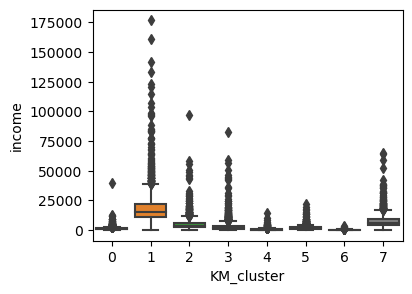

In [50]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[4,3]
sns.boxplot(y=datacq["income"], x=datacq["KM_cluster"], showfliers=True)
plt.draw()

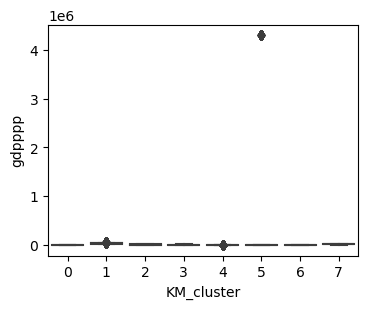

In [51]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[4,3]
sns.boxplot(y=datacq["gdpppp"], x=datacq["KM_cluster"], showfliers=True)
plt.draw()
#on remarque qu'un groupe contient une donnée abérante

In [52]:
datacq.skew()
#confirmé par le skewness de 'gdpppp'

year_survey     -0.309777
quantile         0.000000
nb_quantiles     0.000000
income           4.628566
gdpppp          10.614315
population       6.618241
KM_cluster       0.299916
dtype: float64

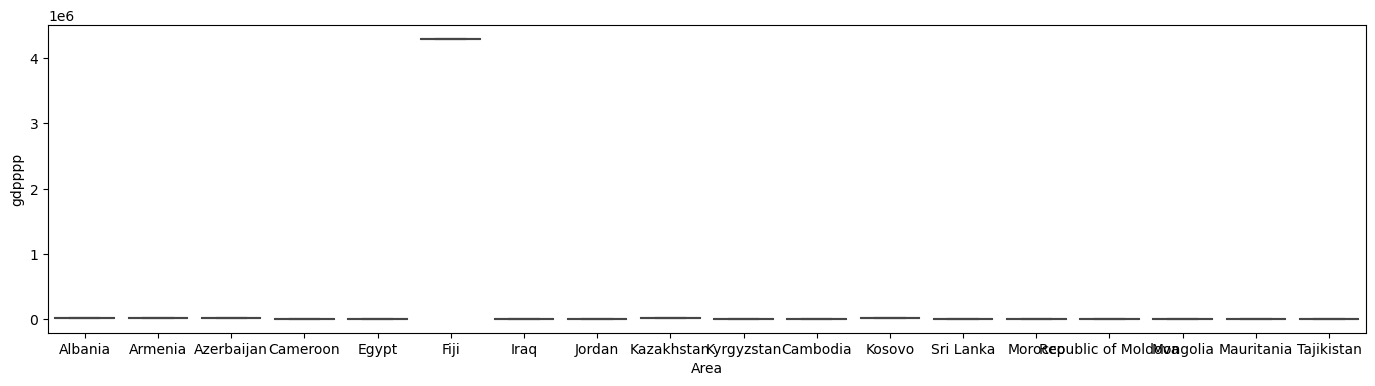

In [53]:
#on recherche le pays concerné, il s'agit de  'Fiji'
plt.style.use('default')
plt.rcParams["figure.figsize"]=[17,4]
out_gd = datacq[datacq["KM_cluster"] == 5].copy()
sns.boxplot(y=out_gd["gdpppp"], x=out_gd["Area"], showfliers=True)
plt.draw()

https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?locations=FJ&name_desc=false 
...source valeur 'gdpppp' Fiji 2008

In [54]:
#on remplace la donnée aberante par la veritable valeur trouvée sur le site de data.worldbank
datacq.loc[datacq["Area"] == 'Fiji','gdpppp'] = 7777

In [55]:
datacq.skew()
#...ça va mieu

year_survey    -0.309777
quantile        0.000000
nb_quantiles    0.000000
income          4.628566
gdpppp          1.615778
population      6.618241
KM_cluster      0.299916
dtype: float64

la moyenne de la colonne  income 6069.121924800409
la mediane de la colonne  income 2403.49295
Ecart-type: 9413.38082093377


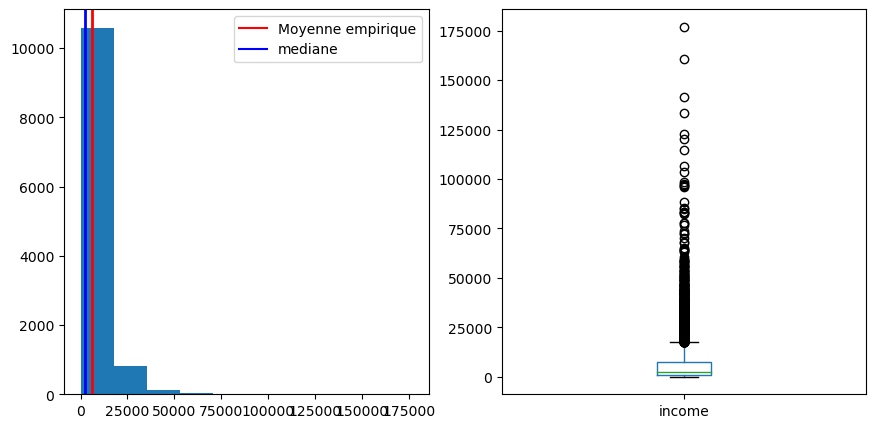

In [56]:
plt.subplot(131)
import matplotlib.lines as mlines
column = 'income'
print("la moyenne de la colonne ",column, datacq[column].mean())
print("la mediane de la colonne ",column, datacq[column].median())
print("Ecart-type:",datacq[column].std(ddof=0))
plt.hist(datacq[column])
plt.axvline(datacq[column].mean(), color='r', linewidth=2)
plt.axvline(datacq[column].median(), color='b', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique"),mlines.Line2D([], [], color='blue',markersize=15, label=u"mediane")])
plt.subplot(132)
datacq[column].plot(kind='box',figsize=(16,5),label=column, showfliers=True)
plt.draw()

la moyenne de la colonne  gdpppp 12437.493092594941
la mediane de la colonne  gdpppp 7532.5
Ecart-type: 13097.47394035235


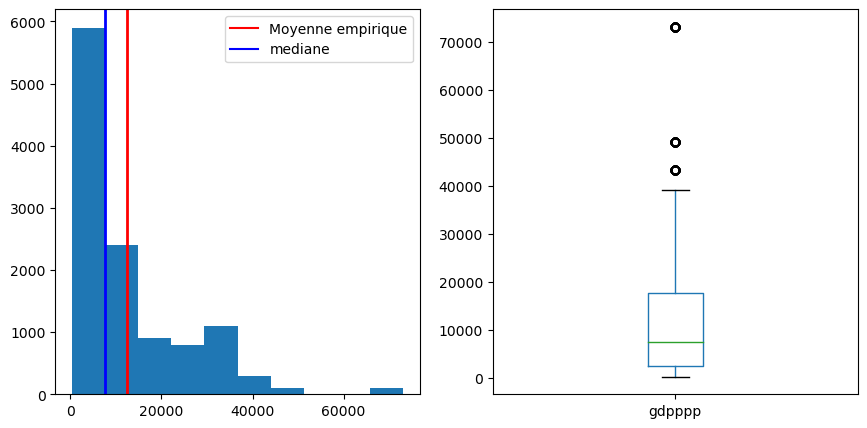

In [57]:
plt.subplot(131)
import matplotlib.lines as mlines
column = 'gdpppp'
print("la moyenne de la colonne ",column, datacq[column].mean())
print("la mediane de la colonne ",column, datacq[column].median())
print("Ecart-type:",datacq[column].std(ddof=0))
plt.hist(datacq[column])
plt.axvline(datacq[column].mean(), color='r', linewidth=2)
plt.axvline(datacq[column].median(), color='b', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique"),mlines.Line2D([], [], color='blue',markersize=15, label=u"mediane")])
plt.subplot(132)
datacq[column].plot(kind='box',figsize=(16,5),label=column, showfliers=True)
plt.draw()

In [58]:
# distance au carré centroid
X_dist = kmeans.transform(X)
y = qua['KM_cluster'].values

In [59]:
X_dist#vérification de l'affectation du label centoid en fonction de la distance de celui ci avec l'observation

array([[10.54692824, 17.83489112,  4.66250957,  5.31103038, 16.36864319,
         4.22573756, 23.66728768,  9.11022414],
       [15.19681073, 13.67261888,  1.58945969,  6.96781274, 20.86433098,
         9.20427601, 28.07765326,  5.32984052],
       [ 5.12731784, 23.52990872, 10.14441159,  6.20730864, 10.83862223,
         2.00663823, 18.09403606, 14.80692191],
       [27.89256398,  0.97307115, 13.54836522, 20.34800002, 33.70791659,
        21.56627622, 41.0053483 ,  8.41714221],
       [ 8.05623956, 20.28962188,  6.81873687,  4.40280907, 13.8724553 ,
         1.75208934, 21.16973604, 11.53619777],
       [ 1.44327842, 28.90411408, 15.31079144,  9.93481666,  5.52806306,
         6.95805519, 12.71636419, 20.15420609],
       [13.64235048, 14.78661383,  2.80225437,  7.4266413 , 19.455251  ,
         7.31791722, 26.74960865,  6.11907738],
       [26.76533031,  1.70169392, 12.4221384 , 19.22261076, 32.57845727,
        20.44133505, 39.87541332,  7.28657927],
       [ 2.82365313, 25.51276806

In [60]:
# integration au dataframe df...(index, distance vers le centroid le plus proche, cluster)
import pandas as pd
df = pd.DataFrame(X_dist.min(axis=1).round(2), columns=['dist'])
df['label'] = y

df.head()

,dist,label
0,4.23,5
1,1.59,2
2,2.01,5
3,0.97,1
4,1.75,5


In [61]:
list_pays=[]
for i in range (0,8):
    temp = qua.reset_index().copy()
    temp = temp.reset_index()
    
    if 'France' in temp.loc[(temp['KM_cluster'] == i)]['Area'].values:
        list_pays.append('France')
    
    else :
        temp1 = df[df['label'] == i]
        temp1 = temp1.reset_index()
        temp2 = temp1.sort_values(by='dist').head(1).copy()
        temp3 = temp.loc[temp2['index']]['Area'].unique()[0]
        list_pays.append(temp3)

In [62]:
list_pays

['Palestine',
 'France',
 'North Macedonia',
 'Paraguay',
 'Guinea',
 'Tajikistan',
 'Madagascar',
 'Estonia']

In [63]:
del temp
del temp1
del temp2
del temp3
del df

In [64]:

kmeans.inertia_


clusters = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

inertia_values = []

for cluster in clusters:
    
    kmeans = KMeans(n_clusters = cluster)
    
    kmeans.fit(X)
    
    inertia_values.append(kmeans.inertia_)

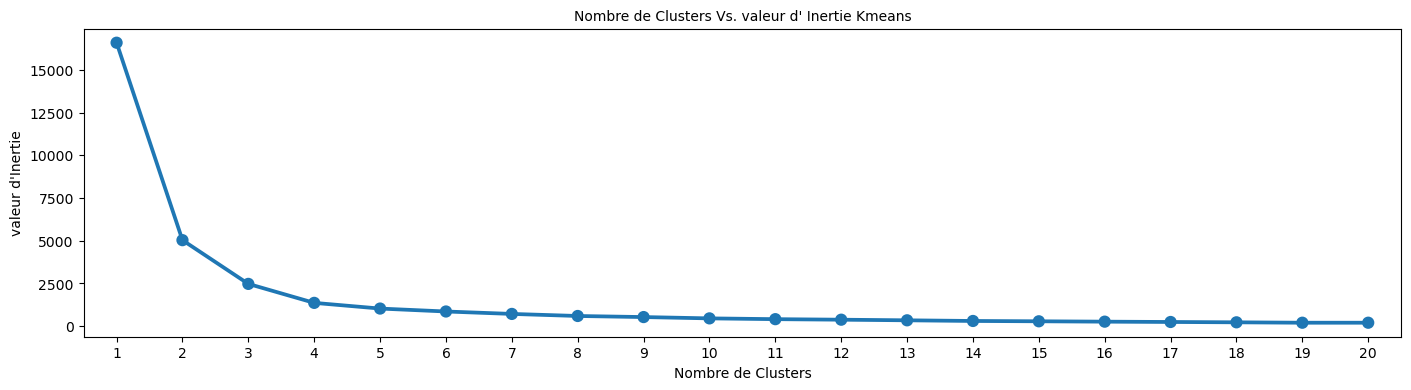

In [65]:
import seaborn as sns

sns.pointplot(x = clusters, y = inertia_values)
plt.xlabel('Nombre de Clusters')
plt.ylabel("valeur d'Inertie")
plt.title("Nombre de Clusters Vs. valeur d' Inertie Kmeans", fontsize=10)
plt.draw()
plt.savefig("coude inertie.jpg",bbox_inches ="tight")

#importation des indices gini du site data.worldbank et création de la courbe de l'indice pour les pays séléctionnés,
#pays dont les données sont disponibles

In [66]:
data = pd.read_csv("gini_worldbank.csv", skiprows=3)#example
print(data.shape)
data

(264, 66)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN
3,Albania,ALB,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN,NaN,NaN
4,Andorra,AND,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,26.3,27.3,26.5,26.7,29.0,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57.1,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
data.drop(columns=['Country Code','Indicator Name','Indicator Code','Unnamed: 65'],inplace=True)
data.set_index("Country Name",inplace=True)

In [68]:
list_pays

['Palestine',
 'France',
 'North Macedonia',
 'Paraguay',
 'Guinea',
 'Tajikistan',
 'Madagascar',
 'Estonia']

In [79]:
#retrait des pays dont nous n'avons pas les indices gini, nouvelle liste :(retrait 'Palestine':list_pays_1  )

In [80]:
list_pays_1 = [ 'France',
 'North Macedonia',
 'Paraguay',
 'Guinea',
 'Tajikistan',
 'Madagascar',
 'Estonia']

In [81]:
data2 = data.loc[list_pays_1].copy()
toto = data2.stack().copy()
toto = toto.to_frame()
toto = toto.reset_index()
toto = toto.rename({'Country Name': 'Pays', 'level_1': 'Année',0: 'Indice de Gini'}, axis='columns')
toto = toto.sort_values('Année')

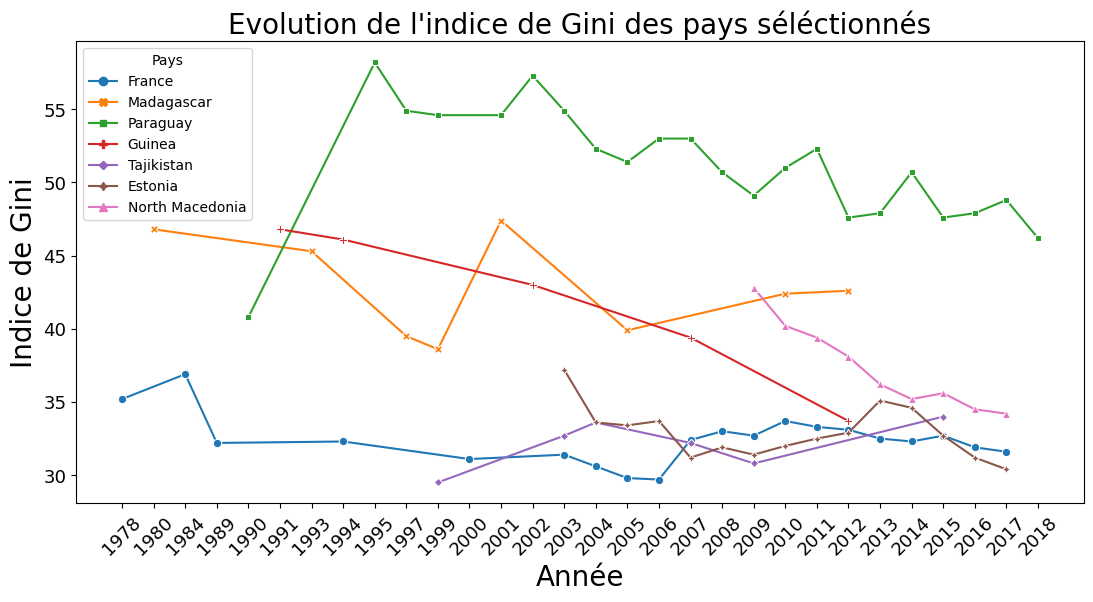

In [82]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[13,6]
sns.lineplot(data=toto, x="Année", y="Indice de Gini", hue="Pays", markers=True, dashes=False, style="Pays")
plt.xlabel("Année",fontsize=20)
plt.ylabel("Indice de Gini",fontsize=20)
plt.title("Evolution de l'indice de Gini des pays séléctionnés", fontsize=20)
plt.xticks(fontsize = 13, rotation = 45,c='k')
plt.yticks(fontsize = 13)
plt.savefig("evo_gini.jpg",bbox_inches ="tight")
plt.draw()

In [83]:
def tenn(dataset):#fonction de creation de df avec uniquement les 8 pays listés

    dataset2=dataset.copy()
    dataset2['choisis']=dataset2['Area'].isin(list_pays)
    dataset2 = dataset2[dataset2["choisis"] == True]
    dataset2 = dataset2.drop(['choisis'], axis = 1).copy()
    return dataset2

#création du df ten avec uniquement les 8 pays listés en applicant notre fonction sur datacq

In [84]:
ten=tenn(datacq)
ten

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Area,population,KM_cluster
3000,EST,2008,1,100,959.5601,18773.0,Estonia,1340072,7
3001,EST,2008,2,100,1535.6865,18773.0,Estonia,1340072,7
3002,EST,2008,3,100,1983.6115,18773.0,Estonia,1340072,7
3003,EST,2008,4,100,2254.5150,18773.0,Estonia,1340072,7
3004,EST,2008,5,100,2501.7200,18773.0,Estonia,1340072,7
...,...,...,...,...,...,...,...,...,...
11295,PSE,2009,96,100,2763.8848,3155.0,Palestine,3856679,0
11296,PSE,2009,97,100,3077.8333,3155.0,Palestine,3856679,0
11297,PSE,2009,98,100,3449.2224,3155.0,Palestine,3856679,0
11298,PSE,2009,99,100,4165.9970,3155.0,Palestine,3856679,0


#création d'une fonction ginip qui rajoute une colonne indice de gini au pays concerné

In [85]:
def ginip(dataset):

    data = []
    Area = []
    for cat in dataset['Area'].unique():
            subset = dataset[dataset.Area == cat]
            toto=subset['income'].values

            lorenz = np.cumsum(np.sort(toto)) / toto.sum()
            lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

            AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/len(toto)
            S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
            gini = 2*S
            Area.append(cat)
            data.append(gini)
            #print(subset[subset['quantile'] == 100]['Area'].values,'gini:',gini)#verif valeurs

    df = pd.DataFrame (data, index = Area,columns=['Gini'])
    df = df.reset_index()
    df.rename(columns={"index":"Area"},inplace=True)
    dataset = pd.merge(dataset, df,on=["Area"],how="inner")
    del df
    return dataset

In [86]:
#rajout d'une colonne indice de gini au dataframe contenant 8 pays avec la fonction ginip
ten = ginip(ten)
ten.sort_values(by=['Gini', 'quantile'], inplace=True)#ordre de traitement pour la courbe qui suit

In [87]:
datacq=ginip(datacq)#rajout de l indice gini a datacq (116 pays)
datacq

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Area,population,KM_cluster,Gini
0,ALB,2008,1,100,728.89795,7297.00000,Albania,3002678,5,0.304624
1,ALB,2008,2,100,916.66235,7297.00000,Albania,3002678,5,0.304624
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,3002678,5,0.304624
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,3002678,5,0.304624
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,3002678,5,0.304624
...,...,...,...,...,...,...,...,...,...,...
11595,COD,2008,96,100,810.62330,303.19305,Congo,4011486,6,0.443997
11596,COD,2008,97,100,911.78340,303.19305,Congo,4011486,6,0.443997
11597,COD,2008,98,100,1057.80740,303.19305,Congo,4011486,6,0.443997
11598,COD,2008,99,100,1286.60290,303.19305,Congo,4011486,6,0.443997


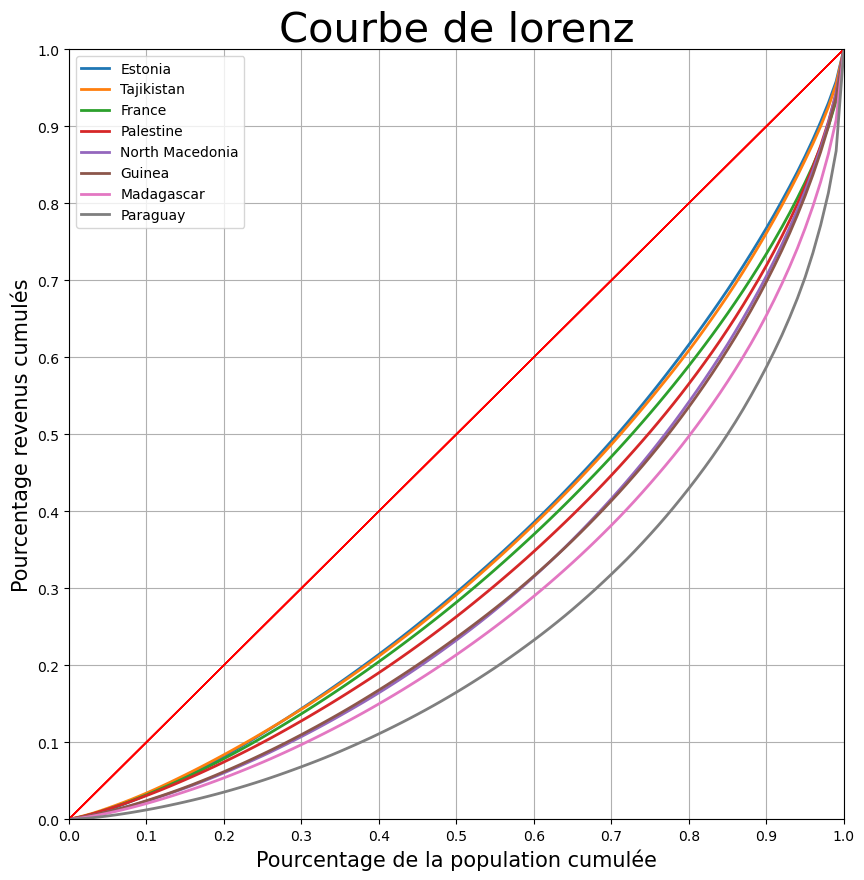

In [88]:
plt.rcParams["figure.figsize"]=[10,10]
for cat in ten['Area'].unique():
        subset = ten[ten.Area == cat]
        toto=subset['income'].values
        lorenz = np.cumsum(np.sort(toto)) / toto.sum()
        lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
        xaxis = np.linspace(0,1,len(lorenz))
        name=subset.Area.unique()[0]
        #plt.plot(xaxis,lorenz,drawstyle='steps-pre', lw=2)
        plt.plot([0, 1], [0, 1], 'r-', lw=1) # Red straight line
        plt.gca().set_xlim(0, 1)
        plt.gca().set_ylim(0, 1)
        plt.xticks( [0,0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1])
        plt.yticks([0,0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1])
        plt.title("Courbe de lorenz", fontsize=30)
        plt.ylabel("Pourcentage revenus cumulés",color='k',fontsize=15)
        plt.xlabel("Pourcentage de la population cumulée", color='k',fontsize=15)

        
        #plt.yscale('log')
        plt.grid(True,which="both")
        #plt.plot(xaxis,lorenz,drawstyle='steps-pre', label=name, lw=2)
        plt.plot(xaxis,lorenz, label=name, lw=2)
        plt.legend(loc='upper left')
        plt.savefig("lor_8p.jpg",bbox_inches ="tight")

plt.draw()

##Création d'un dataframe ext11 avec les 5 pays a l'indice gini le plus bas et 5 au plus haut plus la france

In [89]:
temp = datacq.sort_values(by=['Gini', 'quantile']).copy()
ext11 = temp.iloc[:500,:].append(temp[temp['Area'] == 'France'])
ext11 = ext11.append(temp.iloc[-500:,:])
ext11

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Area,population,KM_cluster,Gini
9600,SVN,2008,1,100,2814.9530,27197.0,Slovenia,2023052,1,0.230731
9601,SVN,2008,2,100,3924.2173,27197.0,Slovenia,2023052,1,0.230731
9602,SVN,2008,3,100,4551.5674,27197.0,Slovenia,2023052,1,0.230731
9603,SVN,2008,4,100,4987.3280,27197.0,Slovenia,2023052,1,0.230731
9604,SVN,2008,5,100,5399.6714,27197.0,Slovenia,2023052,1,0.230731
...,...,...,...,...,...,...,...,...,...,...
11495,ZAF,2008,96,100,24553.5680,9602.0,South Africa,49779471,3,0.669779
11496,ZAF,2008,97,100,28858.0310,9602.0,South Africa,49779471,3,0.669779
11497,ZAF,2008,98,100,35750.2900,9602.0,South Africa,49779471,3,0.669779
11498,ZAF,2008,99,100,46297.3160,9602.0,South Africa,49779471,3,0.669779


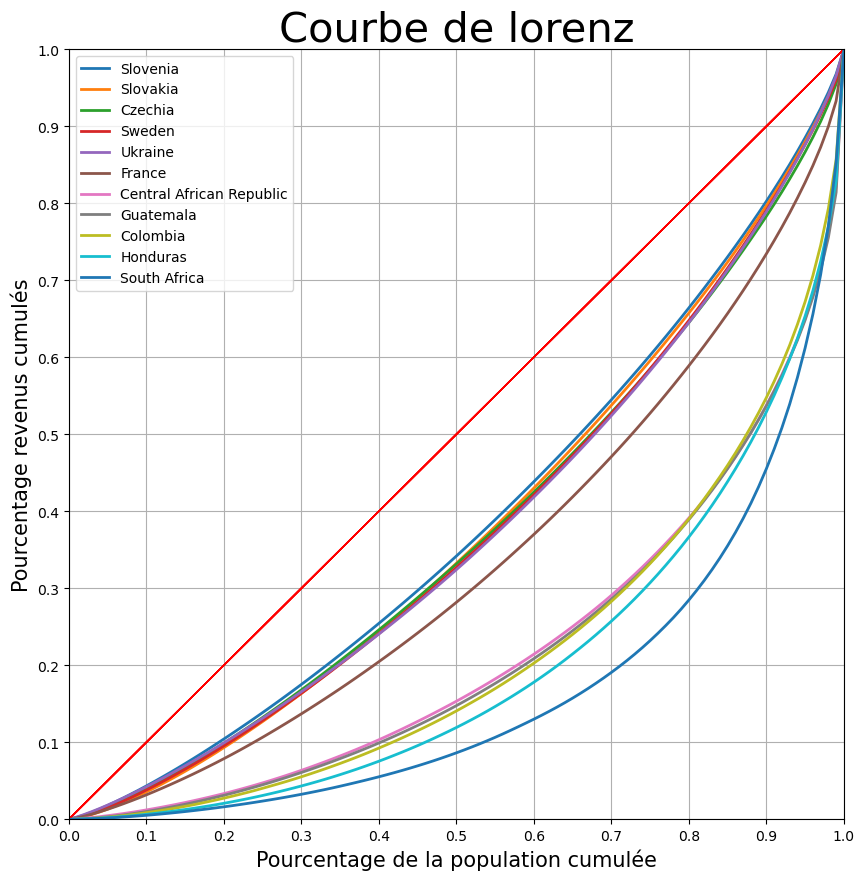

In [90]:
plt.rcParams["figure.figsize"]=[10,10]
for cat in ext11['Area'].unique():
        subset = ext11[ext11.Area == cat]
        toto=subset['income'].values
        lorenz = np.cumsum(np.sort(toto)) / toto.sum()
        lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
        xaxis = np.linspace(0,1,len(lorenz))
        name=subset.Area.unique()[0]
        #plt.plot(xaxis,lorenz,drawstyle='steps-pre', lw=2)
        plt.plot([0, 1], [0, 1], 'r-', lw=1) # Red straight line
        plt.gca().set_xlim(0, 1)
        plt.gca().set_ylim(0, 1)
        plt.xticks( [0,0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1])
        plt.yticks([0,0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1])
        plt.title("Courbe de lorenz", fontsize=30)
        plt.ylabel("Pourcentage revenus cumulés",color='k',fontsize=15)
        plt.xlabel("Pourcentage de la population cumulée", color='k',fontsize=15)

        

        plt.grid(True,which="both")

        plt.plot(xaxis,lorenz, label=name, lw=2)
        plt.legend(loc='upper left')
        plt.savefig("lor_11p.jpg",bbox_inches ="tight")

plt.draw()

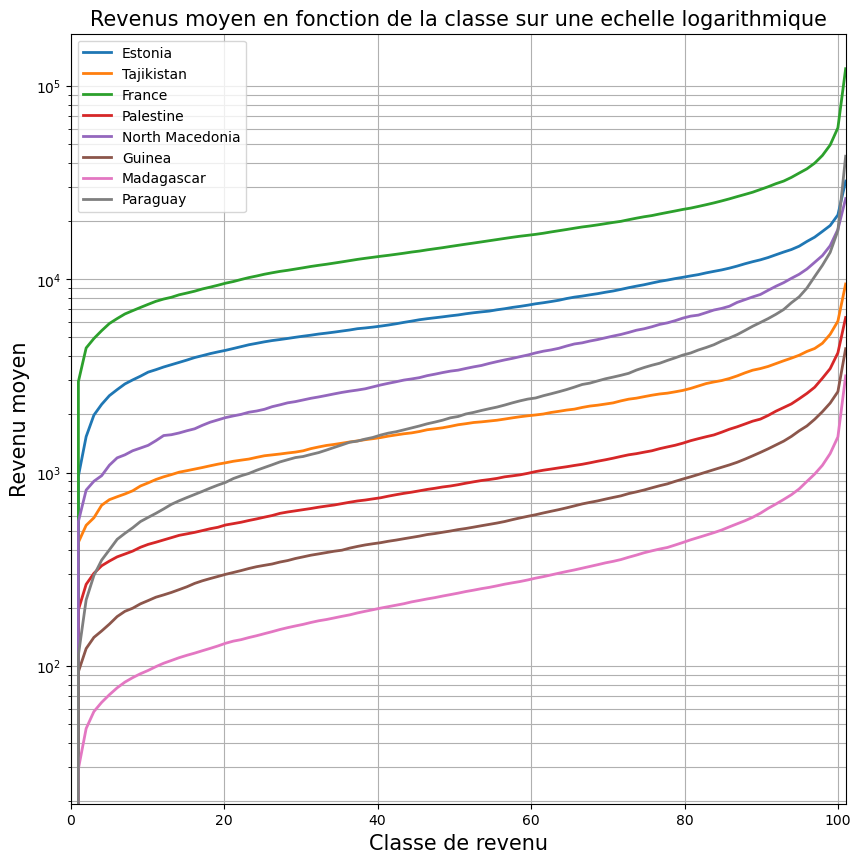

In [91]:
plt.rcParams["figure.figsize"]=[10,10]
for cat in ten['Area'].unique():
        subset = ten[ten.Area == cat]
        toto=subset['income'].values
        lorenz = toto
        lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
        xaxis = np.linspace(0,101,len(lorenz))
        name=subset.Area.unique()[0]

        plt.gca().set_xlim(0, 101)

        plt.title("Revenus moyen en fonction de la classe sur une echelle logarithmique", fontsize=15)
        plt.ylabel("Revenu moyen",color='k',fontsize=15)
        plt.xlabel("Classe de revenu", color='k',fontsize=15)

        
        plt.yscale('log')
        plt.grid(True,which="both")
        
        plt.plot(xaxis,lorenz, label=name, lw=2)
        plt.legend(loc='upper left')
        plt.savefig("revm_8p.jpg",bbox_inches ="tight")

plt.draw()

In [92]:
#calcul de sal_moy qui represente la moyenne des quantile par pays(donnees que nous conservons au cas ou), creation du df
#q3 de 116 lignes representant les pays avec les moyennes de leurs 100 quantiles respectifs, l'indice Gini et le code pays

q3 = qua.copy()
q3 = q3.reset_index()
q3['sal_moy'] = q3.iloc[:,:-1].mean(axis=1)
q3 = pd.merge(q3,datacq[datacq['quantile'] == 1][['Area','Gini','country']].copy(), on = ['Area'], how = 'inner')
q3 = q3[['Area','sal_moy','Gini','country']]
q3

,Area,sal_moy,Gini,country
0,Albania,2994.829902,0.304624,ALB
1,Argentina,5847.884654,0.449902,ARG
2,Armenia,1628.382785,0.263108,ARM
3,Austria,16637.600204,0.278279,AUT
4,Azerbaijan,2357.429023,0.312321,AZE
...,...,...,...,...
111,United States of America,25503.581661,0.431799,USA
112,Uruguay,5290.784920,0.459811,URY
113,Venezuela (Bolivarian Republic of),3167.147724,0.434021,VEN
114,Viet Nam,1377.773966,0.377481,VNM


In [93]:
q3 = q3.sort_values("Gini")
q3 = q3.reset_index()
q3 = q3.drop(['index'], axis = 1)
q3['sal_moy'] = round(q3['sal_moy'],2)
q3['Gini'] = round(q3['Gini'],2)
q3[['Area','Gini']].values
#valeurs indices gini par ordre croissant

array([['Slovenia', 0.23],
       ['Slovakia', 0.25],
       ['Czechia', 0.25],
       ['Sweden', 0.25],
       ['Ukraine', 0.26],
       ['Denmark', 0.26],
       ['Norway', 0.26],
       ['Armenia', 0.26],
       ['Belarus', 0.27],
       ['Kazakhstan', 0.27],
       ['Hungary', 0.27],
       ['Serbia', 0.28],
       ['Finland', 0.28],
       ['Austria', 0.28],
       ['Cyprus', 0.28],
       ['Belgium', 0.28],
       ['Iceland', 0.29],
       ['Netherlands', 0.29],
       ['Montenegro', 0.29],
       ['Luxembourg', 0.29],
       ['Kenya', 0.3],
       ['Pakistan', 0.3],
       ['Estonia', 0.3],
       ['Croatia', 0.3],
       ['Ireland', 0.3],
       ['Albania', 0.3],
       ['Tajikistan', 0.31],
       ['Germany', 0.31],
       ['Spain', 0.31],
       ['Republic of Moldova', 0.31],
       ['Azerbaijan', 0.31],
       ['Cambodia', 0.31],
       ['Kosovo', 0.31],
       ['China, Taiwan Province of', 0.31],
       ['Bangladesh', 0.32],
       ['Italy', 0.32],
       ['Timor-Leste', 0.

In [94]:
q3[q3['Area'] == 'France']#france en 40e position

,Area,sal_moy,Gini,country
39,France,18309.41,0.33,FRA


In [95]:
round(q3['Gini'].mean(),2)#moyenne des indices gini

0.38

In [96]:
q3[['Area' , 'Gini']]

,Area,Gini
0,Slovenia,0.23
1,Slovakia,0.25
2,Czechia,0.25
3,Sweden,0.25
4,Ukraine,0.26
...,...,...
111,Central African Republic,0.56
112,Guatemala,0.57
113,Colombia,0.57
114,Honduras,0.60


In [97]:
ten['Gini'] = round(ten['Gini'],2)
ten[ten['quantile'] == 1][['Area','Gini']].values
#indices gini de nos 8 pays selectionnés dans les groupes générés par kmeans

array([['Estonia', 0.3],
       ['Tajikistan', 0.31],
       ['France', 0.33],
       ['Palestine', 0.36],
       ['North Macedonia', 0.4],
       ['Guinea', 0.4],
       ['Madagascar', 0.44],
       ['Paraguay', 0.53]], dtype=object)

In [98]:
#integration du coefiscient d'elasticité a q3
code.rename(columns={"alpha3":"country"},inplace=True)
code.rename(columns={"name":"Area"},inplace=True)
q3 = pd.merge(q3, code[['country','region']].copy(),on=["country"],how="inner")
#"region":1 = Nordic European countries and Canada |    0.2 
#"region":2 = Europe (except nordic countries)    |    0.4
#"region":3 = Australia/New Zealand/USA |    0.4   
#"region":4 = Asia                      |    0.5  
#"region":5 = Latin America/Africa      |    0.66  
q3["region"].replace({1: 0.2, 2: 0.4, 3: 0.4, 4: 0.5, 5: 0.66}, inplace=True)
q3.rename(columns={"region":"ρj"},inplace=True)
q3

,Area,sal_moy,Gini,country,ρj
0,Slovenia,12106.01,0.23,SVN,0.40
1,Slovakia,6096.58,0.25,SVK,0.40
2,Czechia,8235.29,0.25,CZE,0.40
3,Sweden,16184.22,0.25,SWE,0.20
4,Ukraine,3349.39,0.26,UKR,0.40
...,...,...,...,...,...
111,Central African Republic,811.30,0.56,CAF,0.66
112,Guatemala,2142.47,0.57,GTM,0.66
113,Colombia,3547.01,0.57,COL,0.66
114,Honduras,3296.27,0.60,HND,0.66


In [99]:
#création du dataframe q4 qui contiendra les informations nécessaires aux oprerations suivantes
q4 = pd.merge(datacq[['quantile','nb_quantiles','Area','population','Gini']].copy(),q3[['Area','sal_moy','ρj']].copy(), on = ['Area'], how = 'inner' )
q4

,quantile,nb_quantiles,Area,population,Gini,sal_moy,ρj
0,1,100,Albania,3002678,0.304624,2994.83,0.40
1,2,100,Albania,3002678,0.304624,2994.83,0.40
2,3,100,Albania,3002678,0.304624,2994.83,0.40
3,4,100,Albania,3002678,0.304624,2994.83,0.40
4,5,100,Albania,3002678,0.304624,2994.83,0.40
...,...,...,...,...,...,...,...
11595,96,100,Congo,4011486,0.443997,276.02,0.66
11596,97,100,Congo,4011486,0.443997,276.02,0.66
11597,98,100,Congo,4011486,0.443997,276.02,0.66
11598,99,100,Congo,4011486,0.443997,276.02,0.66


#intégration des fonctions suivantes qui nous seront necessaires

In [100]:
import scipy.stats as st
import pandas as pd
import numpy as np
from collections import Counter


def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)

def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat)

def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]

   

#Généré avec 10 quantiles(classes) afin d'obtenir un graphique clair representant les distributions conditionnelles(mobilité de classes)
#pour pouvoir comparer la mobilité intergenerationelle de deux pays de maniere claire ((suede et afrique du sud))

In [101]:
nb_quantiles = 10       # nombre de quantiles (nombre de classes de revenu)
n  = 1000*nb_quantiles   # taille de l'échantillon

df = pd.DataFrame(columns = ["Area","y_child", "y_parents", "c_i_child","c_i_parent"])
#cds2 = pd.DataFrame(columns = ['index',1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'Area'])
#cds2 = pd.DataFrame(columns=['index',i for i in range(1,cd.shape[1]+1), 'Area'])
cds2 = pd.DataFrame(columns=['index', 'Area'])
#verif=[]
cds=[]
for cat in q4['Area'].unique():

        subset = q4[q4['Area'] == cat]
        pj = subset['ρj'].iloc[0]# coefficient d'élasticité du pays j
        gini = subset['Gini'].iloc[0]# coefficient d'élasticité du pays j
        salm = subset['sal_moy'].iloc[0]# coefficient d'élasticité du pays j
        pop = subset['population'].iloc[0]# coefficient d'élasticité du pays j
        y_child, y_parents = generate_incomes(n, pj)
        sample = compute_quantiles(y_child, y_parents, nb_quantiles)
        cd = conditional_distributions(sample, nb_quantiles)
        c_i_parent = (sample['c_i_parent']).astype(int)-1
        c_i_child = (sample['c_i_child']).astype(int)-1
        p = proba_cond(c_i_parent, c_i_child, cd)
        
        sample['Area'] = cat
        sample['ρj'] = pj
        sample['Gini'] = gini
        sample['sal_moy'] = salm
        sample['population'] = pop
        
        sample['proba_cond'] = p
        
        
        df = df.append(sample, ignore_index=True, sort=False)
        
        
        cds=pd.DataFrame(data=cd[0:,0:],
                         index=[i for i in range(1,cd.shape[0]+1)],
                         columns=[i for i in range(1,cd.shape[1]+1)])
        cds['Area'] = cat
        cds = cds.reset_index()
        cds2 = cds2.append(cds, ignore_index=True, sort=False)


In [102]:
def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure()
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("Mobilité des classes de revenus, p= " + str(p))
    plt.legend()
    plt.xlabel("quantile parents")
    plt.ylabel("probabilité du quantile enfant")
    #if Area isnull():Area =""
    #plt.title("Mobilité des classe de revenus", fontsize=10)
    
    plt.draw()

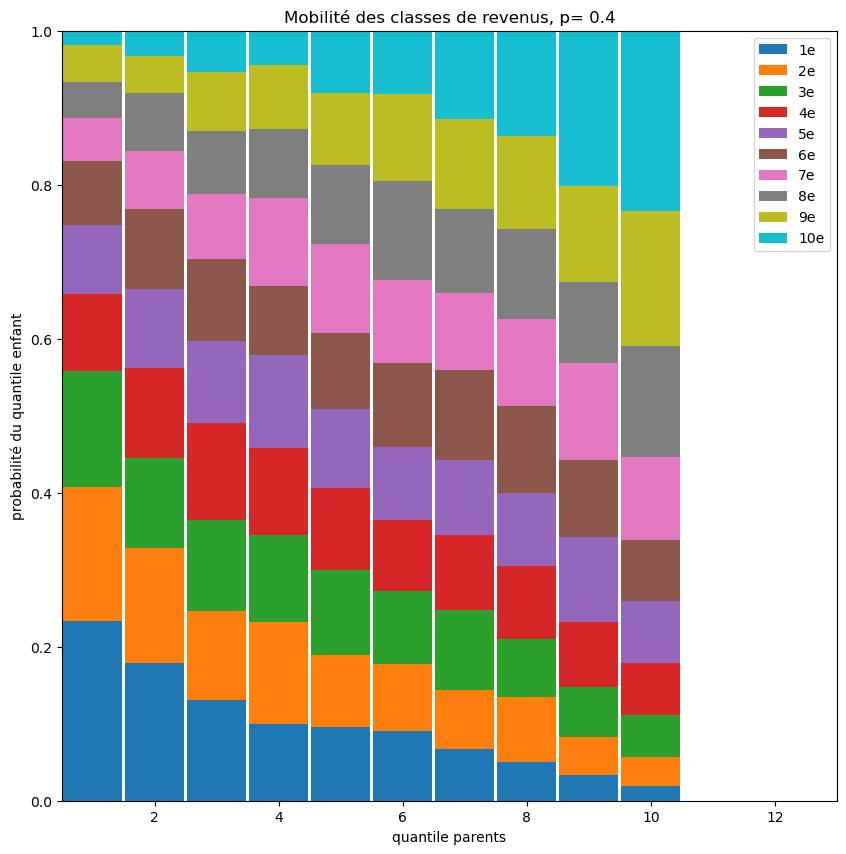

In [103]:
pays = 'France'
#nb_quantiles = 10
pj = q3[q3['Area'] == pays]['ρj'].iloc[0]
cd = cds2[cds2['Area'] == pays].iloc[:,2:].values
plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10
plt.savefig("cond10fr.jpg",bbox_inches ="tight")

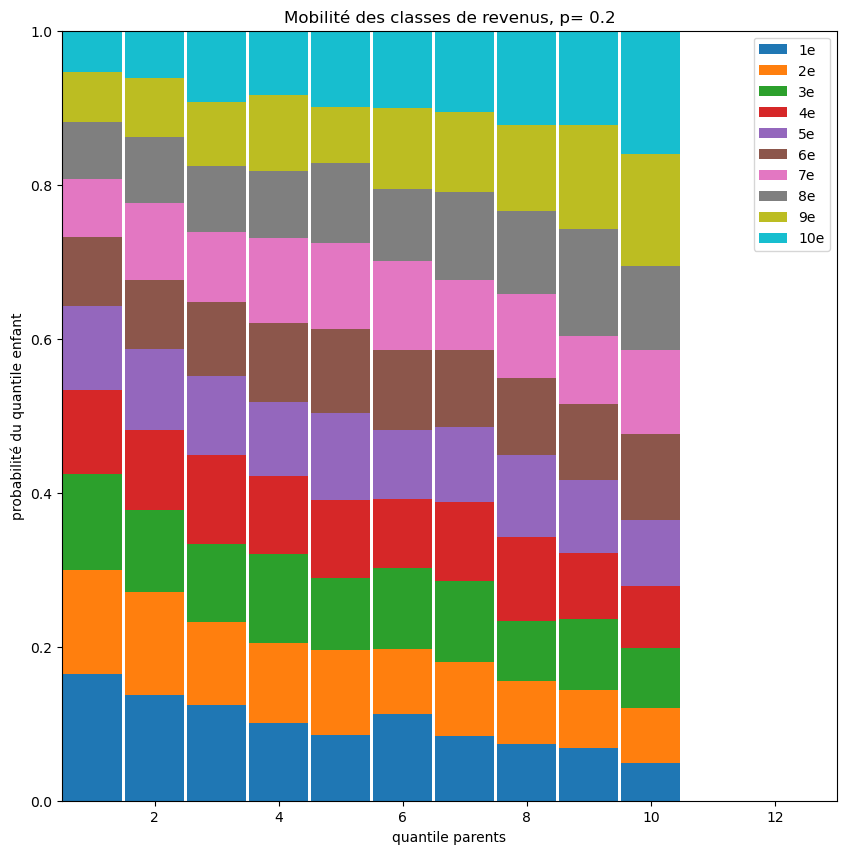

In [104]:
pays = 'Sweden'
#nb_quantiles = 10
pj = q3[q3['Area'] == pays]['ρj'].iloc[0]
cd = cds2[cds2['Area'] == pays].iloc[:,2:].values
plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10
plt.savefig("cond10sw.jpg",bbox_inches ="tight")

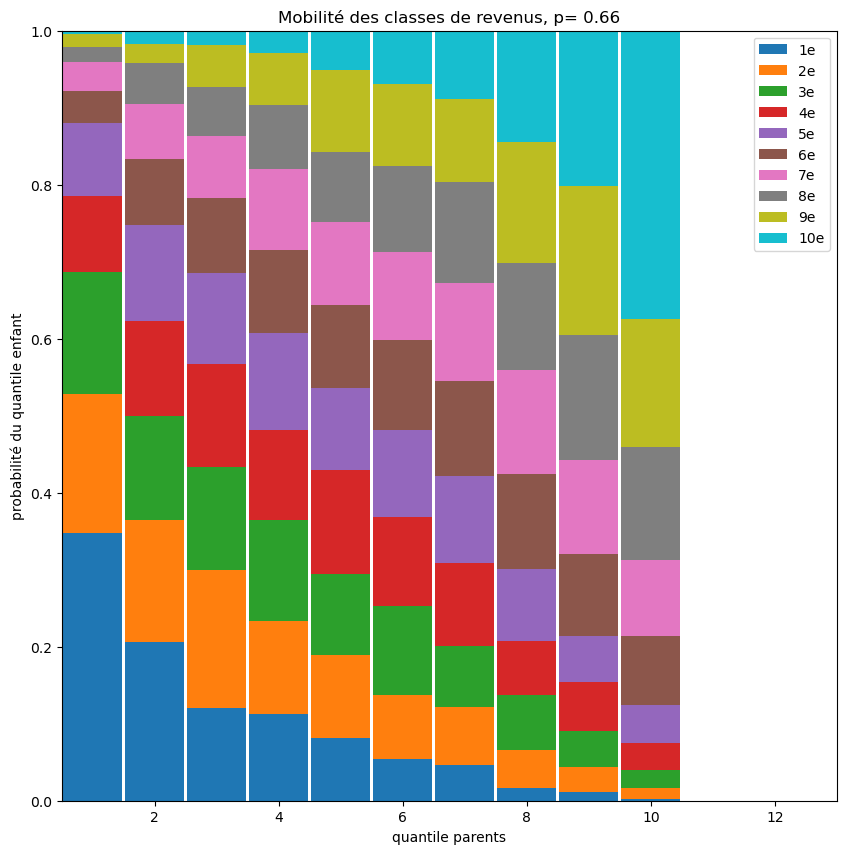

In [105]:
pays = 'South Africa'
#nb_quantiles = 10
pj = q3[q3['Area'] == pays]['ρj'].iloc[0]
cd = cds2[cds2['Area'] == pays].iloc[:,2:].values
plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10
plt.savefig("cond10sa.jpg",bbox_inches ="tight")

génération d’une base de donnée aléatoire nommée df (n=1000) avec 100 quantiles,et génération de la colonne probabilités conditionnelles.

In [106]:
nb_quantiles = 100       # nombre de quantiles (nombre de classes de revenu)
n  = 1000*nb_quantiles   # taille de l'échantillon

df = pd.DataFrame(columns = ["Area","y_child", "y_parents", "c_i_child","c_i_parent"])

cds2 = pd.DataFrame(columns=['index', 'Area'])

cds=[]
for cat in q4['Area'].unique():

        subset = q4[q4['Area'] == cat]
        pj = subset['ρj'].iloc[0]# coefficient d'élasticité du pays j
        gini = subset['Gini'].iloc[0]# coefficient d'élasticité du pays j
        salm = subset['sal_moy'].iloc[0]# coefficient d'élasticité du pays j
        pop = subset['population'].iloc[0]# coefficient d'élasticité du pays j
        y_child, y_parents = generate_incomes(n, pj)
        sample = compute_quantiles(y_child, y_parents, nb_quantiles)
        cd = conditional_distributions(sample, nb_quantiles)
        c_i_parent = (sample['c_i_parent']).astype(int)-1
        c_i_child = (sample['c_i_child']).astype(int)-1
        p = proba_cond(c_i_parent, c_i_child, cd)
        
        sample['Area'] = cat
        sample['ρj'] = pj
        sample['Gini'] = gini
        sample['sal_moy'] = salm
        sample['population'] = pop
        
        sample['proba_cond'] = p

        
        df = df.append(sample, ignore_index=True, sort=False)
        
        
        cds=pd.DataFrame(data=cd[0:,0:],
                         index=[i for i in range(1,cd.shape[0]+1)],
                         columns=[i for i in range(1,cd.shape[1]+1)])
        cds['Area'] = cat
        cds = cds.reset_index()
        cds2 = cds2.append(cds, ignore_index=True, sort=False)
#creation du dataframe cds2 contenant les probabilité conditionelles pour chaque pays

#creation du dataframe cds2 contenant les probabilité conditionelles pour chaque pays

In [107]:
cds2.rename(columns={'index' : 'c_i_child'}, inplace=True)
cds2

,c_i_child,Area,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,1,Albania,0.065,0.058,0.052,0.043,0.041,0.034,0.035,0.021,...,0.001,0.001,0.002,0.000,0.000,0.002,0.000,0.000,0.001,0.000
1,2,Albania,0.052,0.030,0.037,0.028,0.024,0.033,0.029,0.019,...,0.003,0.000,0.002,0.002,0.002,0.003,0.001,0.002,0.001,0.000
2,3,Albania,0.046,0.038,0.035,0.030,0.021,0.019,0.022,0.017,...,0.002,0.004,0.004,0.003,0.004,0.003,0.000,0.001,0.001,0.000
3,4,Albania,0.034,0.032,0.027,0.023,0.027,0.027,0.026,0.025,...,0.000,0.002,0.003,0.001,0.003,0.001,0.001,0.001,0.000,0.001
4,5,Albania,0.034,0.031,0.023,0.024,0.020,0.022,0.023,0.015,...,0.002,0.001,0.007,0.003,0.002,0.001,0.004,0.000,0.001,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,96,Congo,0.000,0.000,0.001,0.000,0.000,0.000,0.002,0.000,...,0.021,0.032,0.030,0.022,0.024,0.024,0.044,0.043,0.039,0.058
11596,97,Congo,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.000,...,0.024,0.029,0.025,0.020,0.031,0.044,0.051,0.033,0.048,0.070
11597,98,Congo,0.000,0.000,0.000,0.001,0.002,0.001,0.000,0.000,...,0.029,0.027,0.035,0.032,0.029,0.028,0.040,0.039,0.062,0.062
11598,99,Congo,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,...,0.027,0.028,0.028,0.035,0.032,0.050,0.049,0.057,0.069,0.083


#verifications :

In [108]:
df.loc[(df["Area"]=="Albania") & (df["c_i_child"]==5) & (df["c_i_parent"]==8)].head(1)

,Area,y_child,y_parents,c_i_child,c_i_parent,ρj,Gini,sal_moy,population,proba_cond
2916,Albania,0.16007,0.238467,5,8,0.4,0.304624,2994.83,3002678.0,0.015


In [109]:
cds2[8].loc[(cds2["Area"]=="Albania") & (cds2["c_i_child"]==5)]

4    0.015
Name: 8, dtype: float64

In [110]:
cds2[8].loc[(cds2["Area"]=="France") & (cds2["c_i_child"]==5)]

3304    0.017
Name: 8, dtype: float64

In [111]:
df.loc[(df["Area"]=="France") & (df["c_i_child"]==5) & (df["c_i_parent"]==8)].head(1)

,Area,y_child,y_parents,c_i_child,c_i_parent,ρj,Gini,sal_moy,population,proba_cond
3302891,France,0.162903,0.24096,5,8,0.4,0.329096,18309.41,62209207.0,0.017


In [112]:
df

,Area,y_child,y_parents,c_i_child,c_i_parent,ρj,Gini,sal_moy,population,proba_cond
0,Albania,1.137040,0.764872,55,40,0.40,0.304624,2994.83,3002678.0,0.009
1,Albania,0.773447,0.451604,41,22,0.40,0.304624,2994.83,3002678.0,0.009
2,Albania,0.942802,0.717904,48,38,0.40,0.304624,2994.83,3002678.0,0.015
3,Albania,1.903226,2.996153,73,87,0.40,0.304624,2994.83,3002678.0,0.012
4,Albania,0.680442,0.147367,37,3,0.40,0.304624,2994.83,3002678.0,0.012
...,...,...,...,...,...,...,...,...,...,...
11599995,Congo,0.914888,0.745367,48,39,0.66,0.443997,276.02,4011486.0,0.011
11599996,Congo,0.813468,1.331536,44,62,0.66,0.443997,276.02,4011486.0,0.014
11599997,Congo,0.323197,0.136219,18,3,0.66,0.443997,276.02,4011486.0,0.019
11599998,Congo,1.096984,0.670610,54,35,0.66,0.443997,276.02,4011486.0,0.014


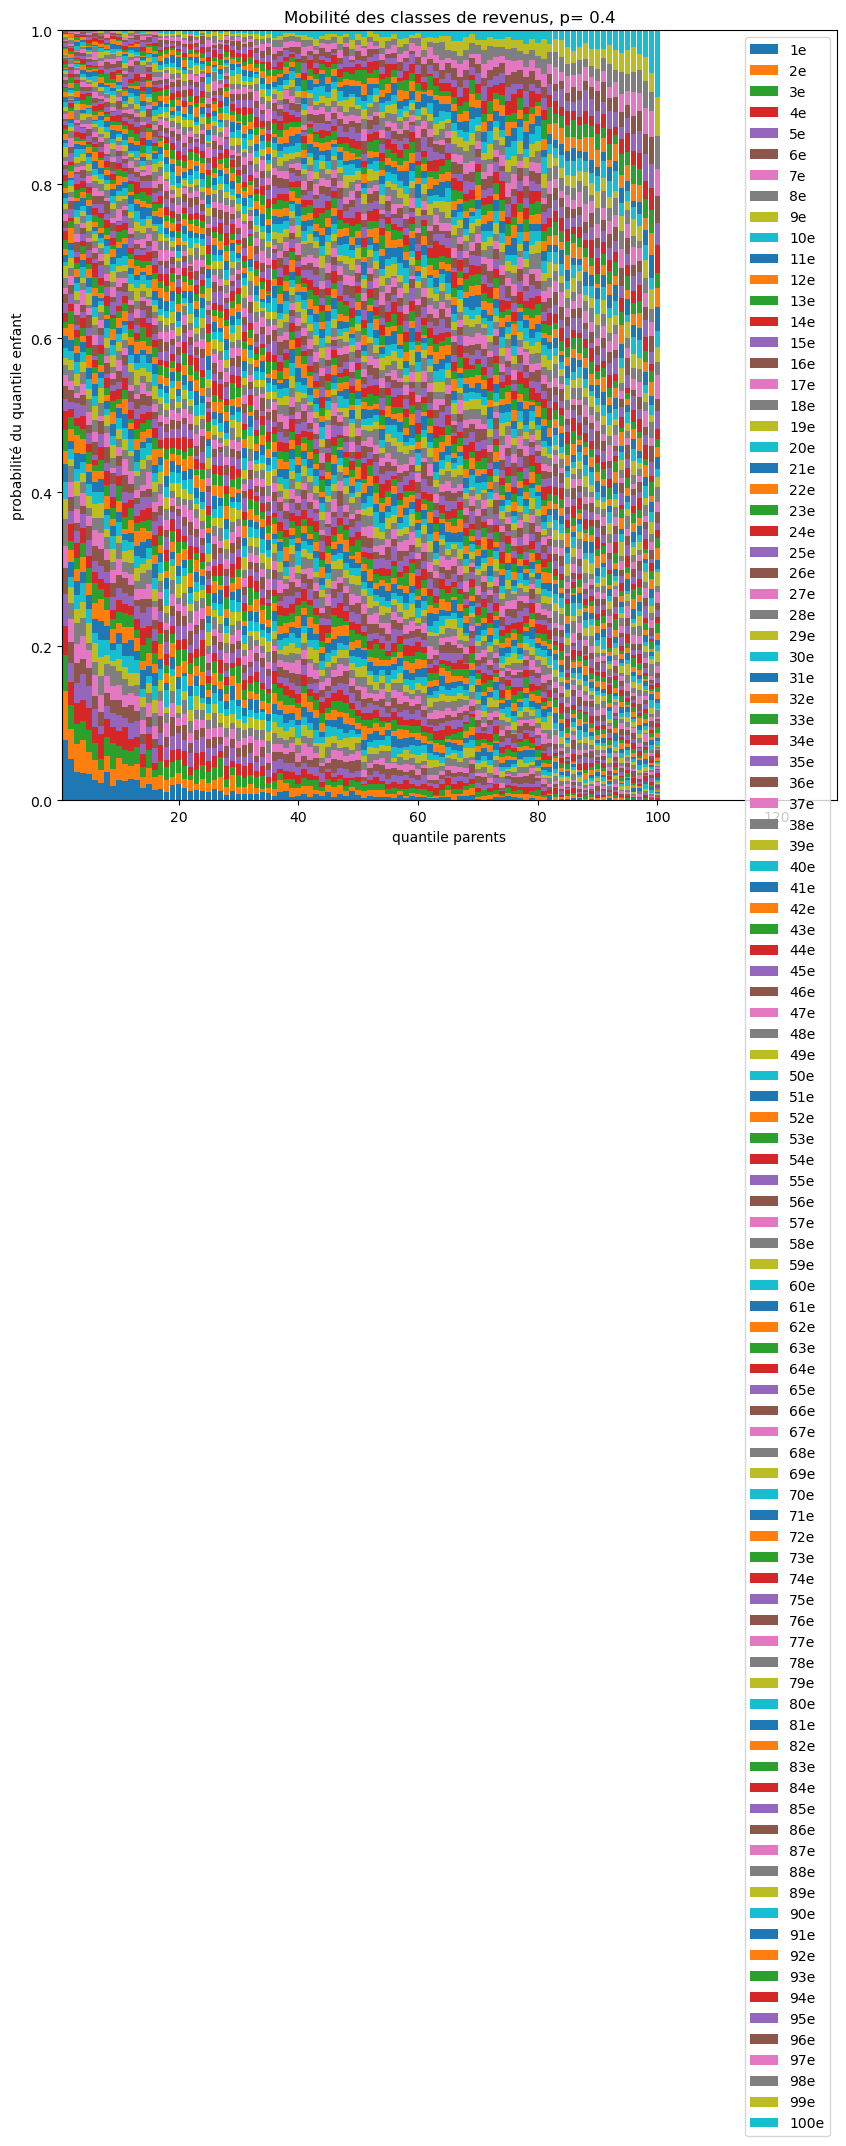

In [113]:
pays = 'France'
#nb_quantiles = 100 test avec la france
pj = q3[q3['Area'] == pays]['ρj'].iloc[0]
cd = cds2[cds2['Area'] == pays].iloc[:,2:].values
plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10

In [114]:
#creation du dataframe counts a partir de df 
counts = df.groupby(["c_i_child","c_i_parent"]).apply(len)
counts = counts.reset_index()
counts.columns = ["c_i_child","c_i_parent","counts"]
counts

,c_i_child,c_i_parent,counts
0,1,1,13044
1,1,2,7889
2,1,3,6357
3,1,4,5231
4,1,5,4629
...,...,...,...
9995,100,96,4619
9996,100,97,5340
9997,100,98,6129
9998,100,99,7910


In [115]:
#creation de du dataframe dfc qui va contenir 100 quantiles enfants ainsi que 100 quantiles parents par quantile enfant, sur 116 pays
#soit un total de 116 00 00 lignes

In [116]:
dfc = pd.DataFrame(columns = ['Area','c_i_child','c_i_parent'])
temp = counts[['c_i_child','c_i_parent']].copy()
for cat in datacq['Area'].unique():
    temp['Area'] = cat
    dfc = dfc.append(temp, ignore_index=True, sort=False)
dfc

,Area,c_i_child,c_i_parent
0,Albania,1,1
1,Albania,1,2
2,Albania,1,3
3,Albania,1,4
4,Albania,1,5
...,...,...,...
1159995,Congo,100,96
1159996,Congo,100,97
1159997,Congo,100,98
1159998,Congo,100,99


In [117]:
#création de temp qui ne va contenir que les colonnes nécessaires à partir de df pour la suite
temp = df[['Area','c_i_child','c_i_parent','Gini','sal_moy','proba_cond']].copy()
temp

,Area,c_i_child,c_i_parent,Gini,sal_moy,proba_cond
0,Albania,55,40,0.304624,2994.83,0.009
1,Albania,41,22,0.304624,2994.83,0.009
2,Albania,48,38,0.304624,2994.83,0.015
3,Albania,73,87,0.304624,2994.83,0.012
4,Albania,37,3,0.304624,2994.83,0.012
...,...,...,...,...,...,...
11599995,Congo,48,39,0.443997,276.02,0.011
11599996,Congo,44,62,0.443997,276.02,0.014
11599997,Congo,18,3,0.443997,276.02,0.019
11599998,Congo,54,35,0.443997,276.02,0.014


#intégration des probabilités coditionnelles genérées dans le dataframe cds2 à dfc sous un nouveau dataframe : dfx2

In [118]:
dfx2 = pd.DataFrame (columns = ['Area', 'c_i_child', 'c_i_parent', 'proba_cond'])
dfxx = dfc.copy()
dfxx["c_i_parent"] = dfxx["c_i_parent"].astype(int)
dfxx["c_i_child"] = dfxx["c_i_child"].astype(int)
for cat in dfxx['Area'].unique():
    subset = cds2[cds2['Area'] == cat].copy()
    subset2 = dfxx[dfxx['Area'] == cat].copy()
    c_i_parent = subset2["c_i_parent"].values-1
    c_i_child = subset2["c_i_child"].values-1
    ce = subset.iloc[:,2:].values
    p = proba_cond(c_i_parent, c_i_child, ce)
    subset2["proba_cond"] = p
    dfx2 = dfx2.append(subset2, ignore_index=True, sort=False)

In [119]:
dfx2

,Area,c_i_child,c_i_parent,proba_cond
0,Albania,1,1,0.065
1,Albania,1,2,0.058
2,Albania,1,3,0.052
3,Albania,1,4,0.043
4,Albania,1,5,0.041
...,...,...,...,...
1159995,Congo,100,96,0.057
1159996,Congo,100,97,0.048
1159997,Congo,100,98,0.060
1159998,Congo,100,99,0.089


In [120]:
#mutiplication par 500 des probabilités conditionelles pour obtenir le nombre de ligne adéquat avec l'utilisation de int au lieu de round de manière a arrondire à l'entier inferieur puis compléter
#avec random.choice : dataframe dft2 (créé a partir de dfx2)

In [121]:
dft2 = dfx2.copy()
dft2['x500'] = ((dft2['proba_cond'])*500).astype(int)
dft2 = dft2.loc[dft2.index.repeat(dft2.x500)].reset_index(drop=True)
dft2 = dft2.drop(['x500'], axis = 1)
dft2

,Area,c_i_child,c_i_parent,proba_cond
0,Albania,1,1,0.065
1,Albania,1,1,0.065
2,Albania,1,1,0.065
3,Albania,1,1,0.065
4,Albania,1,1,0.065
...,...,...,...,...
5512379,Congo,100,100,0.154
5512380,Congo,100,100,0.154
5512381,Congo,100,100,0.154
5512382,Congo,100,100,0.154


In [122]:
dfx2[(dfx2['Area'] == 'Albania') & (dfx2['c_i_child'] == 1)]['proba_cond'].sum()

1.0000000000000002

In [123]:
dft2[(dft2['Area'] == 'Albania') & (dft2['c_i_child'] == 1)]

,Area,c_i_child,c_i_parent,proba_cond
0,Albania,1,1,0.065
1,Albania,1,1,0.065
2,Albania,1,1,0.065
3,Albania,1,1,0.065
4,Albania,1,1,0.065
...,...,...,...,...
472,Albania,1,82,0.003
473,Albania,1,88,0.005
474,Albania,1,88,0.005
475,Albania,1,93,0.002


In [124]:
# création de dfcc qui avec l'outil random choice va compléter les 'c_i_child' manquants (5 heures)

In [125]:
dfcc = pd.DataFrame(columns = dfx2.columns)
sample = []
for cat in dfx2['Area'].unique():
    
    for child in range (1,101):
        subset = dfx2[(dfx2['Area'] == cat) & (dfx2['c_i_child'] == child)].copy()
        distrib = subset ['proba_cond']
        manq = 500 - len(dft2[(dft2['Area'] == cat) & (dft2['c_i_child'] == child)])
        sample =np.random.choice(100, manq, replace = True, p = distrib.values)
        #addd = subset.iloc[sample,:]
        addd = subset.iloc[sample]
        dfcc = dfcc.append(addd, ignore_index=True, sort=False)
dfcc

,Area,c_i_child,c_i_parent,proba_cond
0,Albania,1,12,0.022
1,Albania,1,2,0.058
2,Albania,1,29,0.016
3,Albania,1,15,0.016
4,Albania,1,17,0.016
...,...,...,...,...
287611,Congo,100,94,0.038
287612,Congo,100,85,0.020
287613,Congo,100,99,0.089
287614,Congo,100,100,0.154


In [126]:
## concaténation de dft2 et dfcc afin d obtenir le dataframe voulu

In [127]:
dft2 = dft2.append(dfcc, ignore_index=True, sort=False)
dft2

,Area,c_i_child,c_i_parent,proba_cond
0,Albania,1,1,0.065
1,Albania,1,1,0.065
2,Albania,1,1,0.065
3,Albania,1,1,0.065
4,Albania,1,1,0.065
...,...,...,...,...
5799995,Congo,100,94,0.038
5799996,Congo,100,85,0.020
5799997,Congo,100,99,0.089
5799998,Congo,100,100,0.154


In [128]:
del temp
del df
del qua
del popm
del ce

#création du dataframe final contenant toutes les informations necessaires et sauvegarde

In [129]:
f_data = datacq[['quantile','income','gdpppp','Area','population','Gini']].copy()
f_data=pd.merge(f_data,q3[['Area','sal_moy','ρj']].copy(), on = ['Area'], how = 'inner' )
f_data.rename(columns={'quantile': 'c_i_parent'}, inplace=True)
f_data=pd.merge(dft2.copy(),f_data, on = ['Area','c_i_parent'], how = 'inner' )
f_data['c_i_parent'] = f_data['c_i_parent'].astype(int)
f_data['c_i_child'] = f_data['c_i_child'].astype(int)
f_data

,Area,c_i_child,c_i_parent,proba_cond,income,gdpppp,population,Gini,sal_moy,ρj
0,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40
1,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40
2,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40
3,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40
4,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40
...,...,...,...,...,...,...,...,...,...,...
5799995,Congo,100,100,0.154,2243.12260,303.19305,4011486,0.443997,276.02,0.66
5799996,Congo,100,100,0.154,2243.12260,303.19305,4011486,0.443997,276.02,0.66
5799997,Congo,100,100,0.154,2243.12260,303.19305,4011486,0.443997,276.02,0.66
5799998,Congo,100,100,0.154,2243.12260,303.19305,4011486,0.443997,276.02,0.66


#Ajout des quantiles revenus enfants 'income_c'

In [130]:
temp = f_data[['Area','c_i_parent','income']].copy()
temp = temp.drop_duplicates()
temp.rename(columns={'c_i_parent': 'c_i_child'}, inplace=True)
temp.rename(columns={'income': 'income_c'}, inplace=True)
temp

,Area,c_i_child,income_c
0,Albania,1,728.89795
511,Albania,2,916.66235
1012,Albania,3,1010.91600
1525,Albania,4,1086.90780
2037,Albania,5,1132.69970
...,...,...,...
5797484,Congo,96,810.62330
5797992,Congo,97,911.78340
5798492,Congo,93,639.25930
5798980,Congo,98,1057.80740


#intégration du revenu enfant

In [131]:
f_data=pd.merge(f_data,temp, on = ['Area','c_i_child'], how = 'inner' )
f_data.to_csv('f_data.csv', index = False)
del temp
f_data

,Area,c_i_child,c_i_parent,proba_cond,income,gdpppp,population,Gini,sal_moy,ρj,income_c
0,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40,728.89795
1,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40,728.89795
2,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40,728.89795
3,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40,728.89795
4,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40,728.89795
...,...,...,...,...,...,...,...,...,...,...,...
5799995,Congo,99,100,0.083,2243.12260,303.19305,4011486,0.443997,276.02,0.66,1286.60290
5799996,Congo,99,100,0.083,2243.12260,303.19305,4011486,0.443997,276.02,0.66,1286.60290
5799997,Congo,99,100,0.083,2243.12260,303.19305,4011486,0.443997,276.02,0.66,1286.60290
5799998,Congo,99,100,0.083,2243.12260,303.19305,4011486,0.443997,276.02,0.66,1286.60290


In [132]:
f_data.groupby(['Area','c_i_child']).count()#verification 500 'c_i_child'

c_i_parent  proba_cond  income  gdpppp  population  Gini  \
Area    c_i_child                                                             
Albania 1                 500         500     500     500         500   500   
        2                 500         500     500     500         500   500   
        3                 500         500     500     500         500   500   
        4                 500         500     500     500         500   500   
        5                 500         500     500     500         500   500   
...                       ...         ...     ...     ...         ...   ...   
Yemen   96                500         500     500     500         500   500   
        97                500         500     500     500         500   500   
        98                500         500     500     500         500   500   
        99                500         500     500     500         500   500   
        100               500         500     500     500         500   500   

                   sal_moy   ρj  income_c  
Area    c_i_child                          
Albania 1              500  500       500  
        2              500  500       500  
        3              500  500       500  
        4              500  500       500  
        5              500  500       500  
...                    ...  ...       ...  
Yemen   96             500  500       500  
        97             500  500       500  
        98             500  500       500  
        99             500  500       500  
        100            500  500       500  

[11600 rows x 9 columns]

In [133]:
del f_data

###############################################################################################################################

#####COMMENCER ICI POUR EVITER 5H DE CALCUL , A CONDITION D'AVOIR LE FICHIER f_data.csv EN VOTRE POSSESSION

###############################################################################################################################

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection
from sklearn import preprocessing
from sklearn import decomposition
import scipy.stats as st
from scipy.stats import ks_2samp
import matplotlib.lines as mlines
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
#from functions import *

In [135]:
f_data = pd.read_csv("f_data.csv")
print(f_data.shape)
f_data

(5800000, 11)


,Area,c_i_child,c_i_parent,proba_cond,income,gdpppp,population,Gini,sal_moy,ρj,income_c
0,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40,728.89795
1,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40,728.89795
2,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40,728.89795
3,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40,728.89795
4,Albania,1,1,0.065,728.89795,7297.00000,3002678,0.304624,2994.83,0.40,728.89795
...,...,...,...,...,...,...,...,...,...,...,...
5799995,Congo,99,100,0.083,2243.12260,303.19305,4011486,0.443997,276.02,0.66,1286.60290
5799996,Congo,99,100,0.083,2243.12260,303.19305,4011486,0.443997,276.02,0.66,1286.60290
5799997,Congo,99,100,0.083,2243.12260,303.19305,4011486,0.443997,276.02,0.66,1286.60290
5799998,Congo,99,100,0.083,2243.12260,303.19305,4011486,0.443997,276.02,0.66,1286.60290


In [136]:
f_data.describe()

,c_i_child,c_i_parent,proba_cond,income,gdpppp,population,Gini,sal_moy,ρj,income_c
count,5.800000e+06,5.800000e+06,5.800000e+06,5.800000e+06,5.800000e+06,5.800000e+06,5.800000e+06,5.800000e+06,5.800000e+06,5.800000e+06
mean,5.050000e+01,5.050766e+01,1.382645e-02,6.070994e+03,1.243749e+04,5.360416e+07,3.789671e-01,6.069122e+03,5.125862e-01,6.069122e+03
std,2.886607e+01,2.887323e+01,9.620137e-03,9.417835e+03,1.309748e+04,1.716963e+08,8.939364e-02,6.632194e+03,1.280229e-01,9.413382e+03
min,1.000000e+00,1.000000e+00,1.000000e-03,1.671942e+01,3.031931e+02,3.108560e+05,2.307313e-01,2.760200e+02,2.000000e-01,1.671942e+01
25%,2.575000e+01,2.600000e+01,9.000000e-03,9.008515e+02,2.577500e+03,4.451312e+06,3.104198e-01,1.374267e+03,4.000000e-01,9.007685e+02
50%,5.050000e+01,5.100000e+01,1.200000e-02,2.403741e+03,7.532500e+03,1.380586e+07,3.608933e-01,3.287175e+03,5.000000e-01,2.403493e+03
75%,7.525000e+01,7.600000e+01,1.600000e-02,7.515635e+03,1.767925e+04,3.986403e+07,4.359083e-01,7.077900e+03,6.600000e-01,7.515314e+03
max,1.000000e+02,1.000000e+02,1.870000e-01,1.769285e+05,7.312700e+04,1.383986e+09,6.697785e-01,2.688851e+04,6.600000e-01,1.769285e+05


In [137]:
f_data[f_data['gdpppp']>4000000]

,Area,c_i_child,c_i_parent,proba_cond,income,gdpppp,population,Gini,sal_moy,ρj,income_c


In [138]:
f_data.groupby(['Area','c_i_child']).count()#verification 500 'c_i_child'

c_i_parent  proba_cond  income  gdpppp  population  Gini  \
Area    c_i_child                                                             
Albania 1                 500         500     500     500         500   500   
        2                 500         500     500     500         500   500   
        3                 500         500     500     500         500   500   
        4                 500         500     500     500         500   500   
        5                 500         500     500     500         500   500   
...                       ...         ...     ...     ...         ...   ...   
Yemen   96                500         500     500     500         500   500   
        97                500         500     500     500         500   500   
        98                500         500     500     500         500   500   
        99                500         500     500     500         500   500   
        100               500         500     500     500         500   500   

                   sal_moy   ρj  income_c  
Area    c_i_child                          
Albania 1              500  500       500  
        2              500  500       500  
        3              500  500       500  
        4              500  500       500  
        5              500  500       500  
...                    ...  ...       ...  
Yemen   96             500  500       500  
        97             500  500       500  
        98             500  500       500  
        99             500  500       500  
        100            500  500       500  

[11600 rows x 9 columns]

In [139]:
f_data.isna().sum()

Area          0
c_i_child     0
c_i_parent    0
proba_cond    0
income        0
gdpppp        0
population    0
Gini          0
sal_moy       0
ρj            0
income_c      0
dtype: int64

#######################################################

In [140]:
anova_inca = smf.ols('income_c~Area', data=f_data).fit()
print(anova_inca.summary())

                            OLS Regression Results                            
Dep. Variable:               income_c   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 4.971e+04
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        02:26:01   Log-Likelihood:            -5.9310e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799884   BIC:                         1.186e+08
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

test de Fisher : p-valeur de ce test ( 0 ) est très petite et largement inférieure à 5 %. 
On rejette donc l'hypothèse H0 selon laquelle  α1=α2=α3=α4=0 : donc influence du pays sur le revenu de l'enfant

Tableau de l'analyse de la variance :

In [141]:
sm.stats.anova_lm(anova_inca, typ=2)

,sum_sq,df,F,PR(>F)
Area,2.551188e+14,115.0,49710.75889,0.0
Residual,2.588293e+14,5799884.0,NaN,NaN


In [142]:
anova_inca = smf.ols('np.log(income_c)~Area', data=f_data).fit()
print(anova_inca.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(income_c)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.358e+05
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        02:28:38   Log-Likelihood:            -6.3135e+06
No. Observations:             5800000   AIC:                         1.263e+07
Df Residuals:                 5799884   BIC:                         1.263e+07
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

tableau de l'analyse de la variance :

In [143]:
sm.stats.anova_lm(anova_inca, typ=2)

,sum_sq,df,F,PR(>F)
Area,8.067209e+06,115.0,135832.373968,0.0
Residual,2.995308e+06,5799884.0,NaN,NaN


In [144]:
reg_multi = smf.ols('income_c~gdpppp+Gini', data=f_data).fit()
print(reg_multi.summary())
#le r² est pas terrible

                            OLS Regression Results                            
Dep. Variable:               income_c   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                 2.351e+06
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        02:28:41   Log-Likelihood:            -5.9577e+07
No. Observations:             5800000   AIC:                         1.192e+08
Df Residuals:                 5799997   BIC:                         1.192e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -638.8647     15.135    -42.211      0.0

In [145]:
reg_multi = smf.ols('np.log(income_c)~np.log(gdpppp)+Gini', data=f_data).fit()
print(reg_multi.summary())
#la fonction log a bien amélioré le model

                            OLS Regression Results                            
Dep. Variable:       np.log(income_c)   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                 5.447e+06
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        02:28:45   Log-Likelihood:            -7.0366e+06
No. Observations:             5800000   AIC:                         1.407e+07
Df Residuals:                 5799997   BIC:                         1.407e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7917      0.003    239.

On remarque qu'à présent, tous les paramètres sont significatifs. Quant au  𝑅2 , il vaut environ 0.526, tout comme le  𝑅2  ajusté.


In [146]:
tabl = sm.stats.anova_lm(reg_multi, typ=2)
tabl

,sum_sq,df,F,PR(>F)
np.log(gdpppp),6.051754e+06,1.0,9.132310e+06,0.0
Gini,9.484873e+04,1.0,1.431301e+05,0.0
Residual,3.843514e+06,5799997.0,NaN,NaN


In [147]:
reg_multi = smf.ols('income_c~gdpppp+Gini+c_i_parent', data=f_data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:               income_c   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                 1.759e+06
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        02:28:49   Log-Likelihood:            -5.9423e+07
No. Observations:             5800000   AIC:                         1.188e+08
Df Residuals:                 5799996   BIC:                         1.188e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3423.9534     15.546   -220.251      0.0

In [148]:
reg_multi = smf.ols('np.log(income_c)~np.log(gdpppp)+c_i_parent+Gini', data=f_data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(income_c)   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 4.686e+06
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        02:28:53   Log-Likelihood:            -6.5330e+06
No. Observations:             5800000   AIC:                         1.307e+07
Df Residuals:                 5799996   BIC:                         1.307e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2231      0.003     72.

In [149]:
tabl = sm.stats.anova_lm(reg_multi, typ=2)
tabl

,sum_sq,df,F,PR(>F)
np.log(gdpppp),6.052096e+06,1.0,1.086455e+07,0.0
c_i_parent,6.126266e+05,1.0,1.099770e+06,0.0
Gini,9.489833e+04,1.0,1.703588e+05,0.0
Residual,3.230887e+06,5799996.0,NaN,NaN


np.log(income_c) = 
0.2231 
+ 0.8655*np.log(gdpppp)
+ 0.0113*c_i_parent
-1,4973*Gini 

test du modele

In [150]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0949730068035852, 1.000000026088889, 1.0949730097750463]

Ici, tous les coefficients sont inférieurs à 10 (et > a TOL = 1/vif), il n'y a donc pas de problème de colinéarité(vif).
(si superieur ou egal a 10 , 1 ou plusiueurs variables sont liées, il faudrait en retirer)


Testez l’homoscédasticité
On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [151]:
def plot_scale_location(model,title):
    # model values
    model_fitted_y = model.fittedvalues
    # normalized residuals
    model_norm_residuals = model.get_influence().resid_studentized_internal    
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    
    plot = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot.axes[0].set_title('Scale-Location '+ title)
    plot.axes[0].set_xlabel('Fitted values')
    plot.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


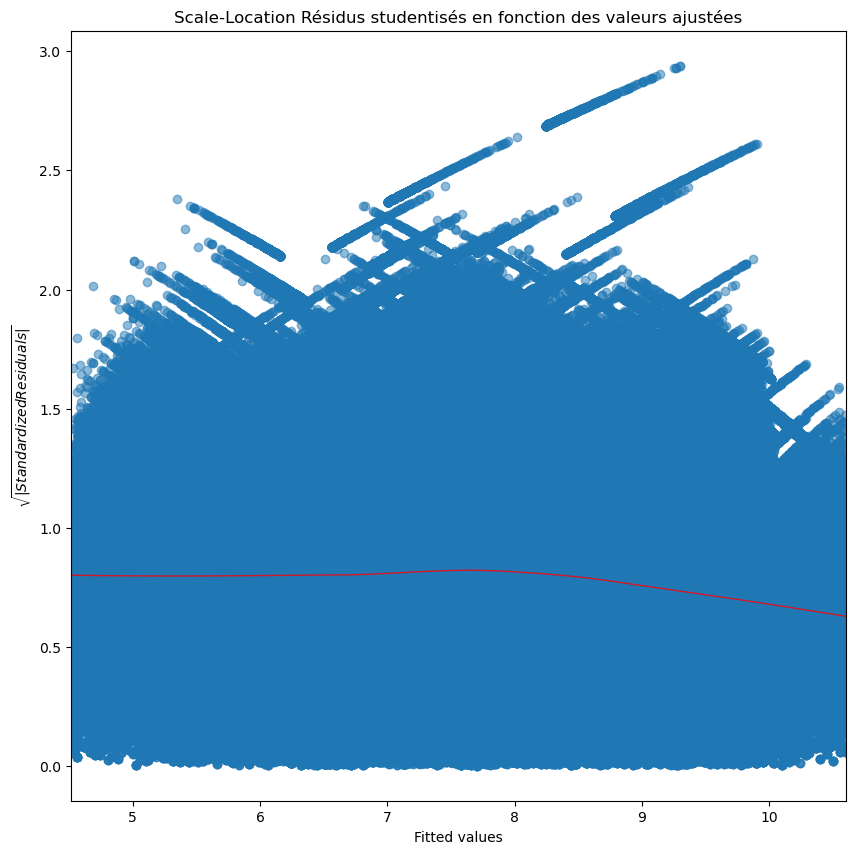

In [152]:
plot_scale_location(reg_multi,'Résidus studentisés en fonction des valeurs ajustées')
plt.savefig("homosc.jpg",bbox_inches ="tight")
#Etude de  l'homoscédasticité des résidus, c'est-à-dire la constance de leur variance, 
#en représentant graphiquement les résidus studentisés en fonction des valeurs ajustées. 
#Un nuage avec une forme conique peut laisser présager un effet hétéroscédastique.

In [153]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


La p-valeur ici est  inférieure à  5 %, on rejette l'hypothèse  𝐻0  selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

Testez la normalité des résidus
Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

In [154]:
shapiro(reg_multi.resid)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9911724925041199, pvalue=0.0)

In [155]:
import scipy.stats as st
from scipy.stats import levene
from scipy.stats import kstest

In [156]:
st.kstest(reg_multi.resid,'norm')

KstestResult(statistic=0.08415167794768807, pvalue=0.0)

Ici, l'hypothèse de normalité est remise en cause (p-value = 0.0).

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien.



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


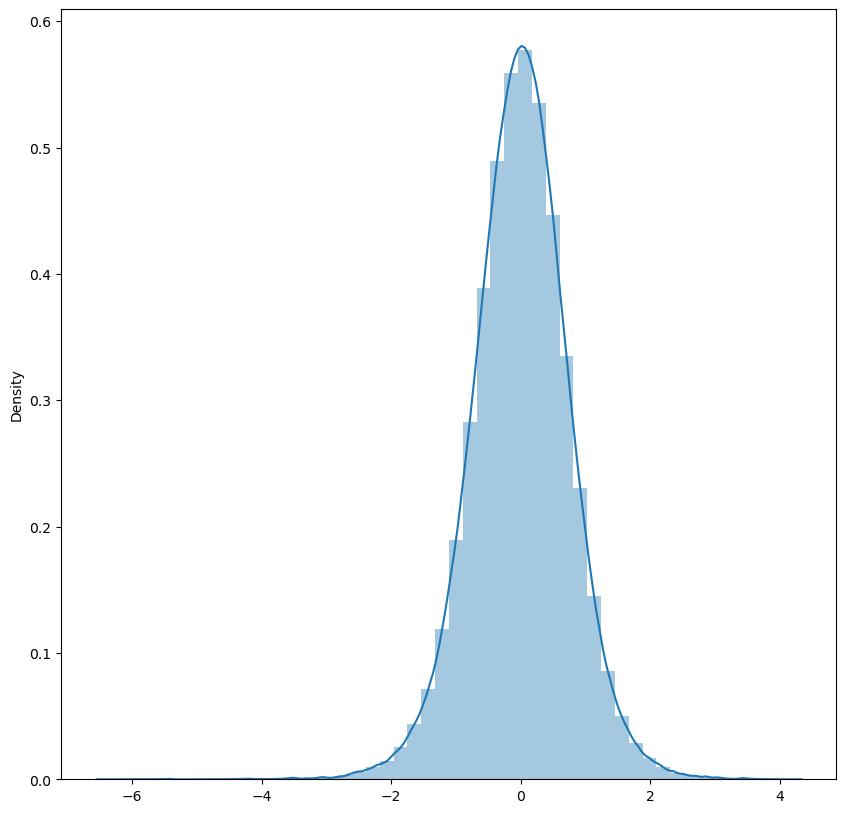

In [157]:
sns.distplot(reg_multi.resid)
plt.draw()
plt.savefig("residnorm.jpg",bbox_inches ="tight")

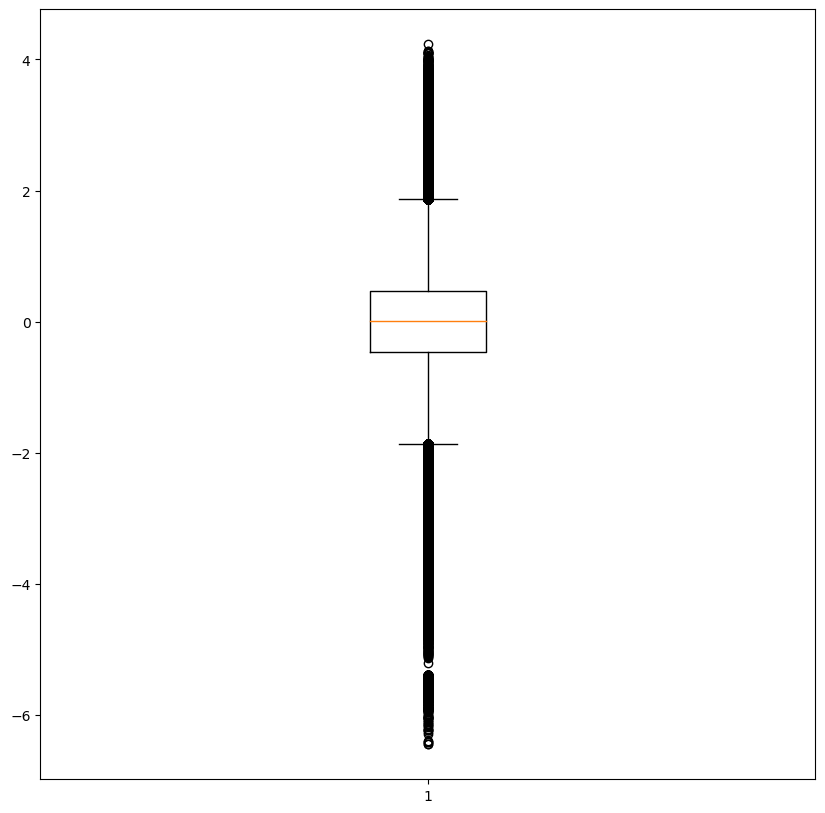

In [158]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.boxplot(reg_multi.resid)
plt.draw()

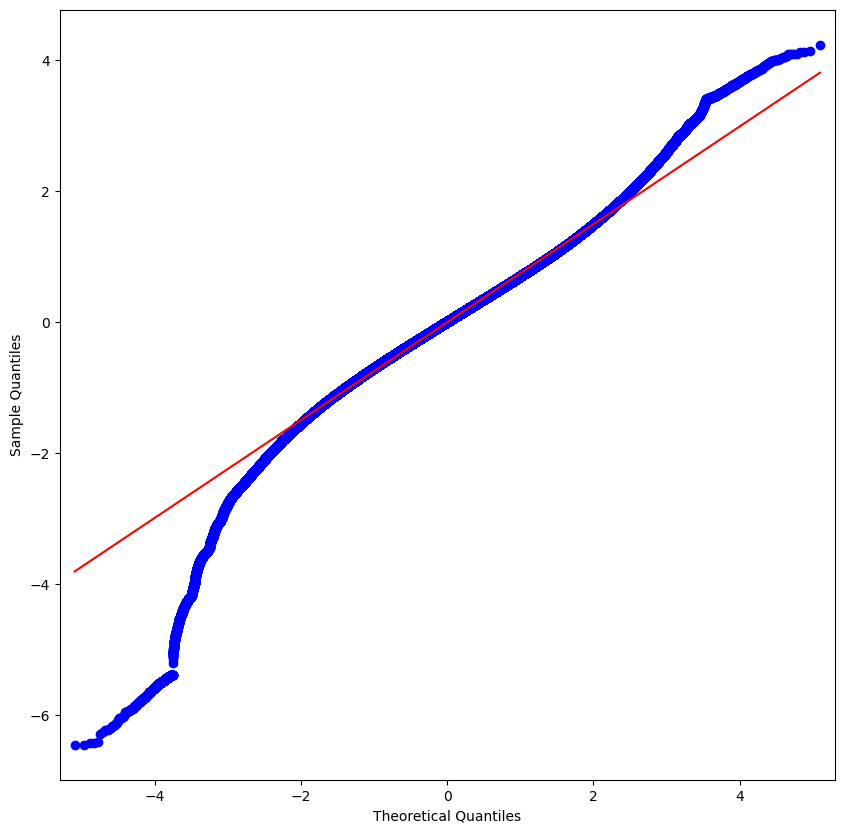

In [159]:
res = reg_multi.resid
fig = sm.qqplot(res, line='s')
plt.show()

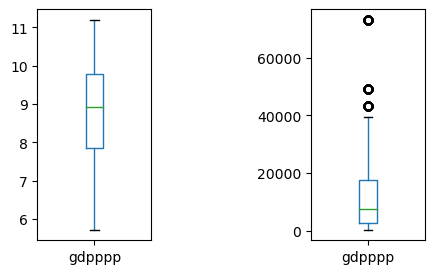

In [160]:
plt.subplot(131)
np.log(datacq['gdpppp']).plot(kind='box',figsize=(5,3),label=column, showfliers=True)
plt.subplot(133)
datacq['gdpppp'].plot(kind='box',figsize=(5,3),label=column, showfliers=True)
plt.draw()

On peut procéder à la transformation logarithmique de la distribution d'une variable de nos données pour la rendre plus facilement observable ou encore pour qu'elle corresponde aux hypothèses des tests statistiques que nous voulons appliquer.
La transformation logarithmique permet en général de rapprocher des valeurs extrêmes pour obtenir des graphes de distribution moins étendus.

In [161]:
#skewness (mesure de son asymétrie)

In [162]:
datacq['gdpppp'].skew() , np.log(datacq['gdpppp']).skew()

(1.6157776920528555, -0.29964890639727837)

In [163]:
#kurtosis (mesure de l’aplatissement de la distribution)

In [164]:
datacq['gdpppp'].kurt() , np.log(datacq['gdpppp']).kurt()

(3.0352994663210517, -0.7530618673400005)

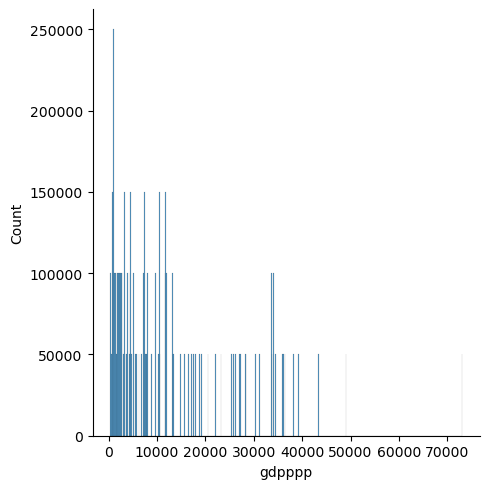

In [165]:
sns.displot(f_data['gdpppp'])